Madau & Pozzeti https://academic.oup.com/mnras/article/312/2/L9/973381

# Euclid Filter

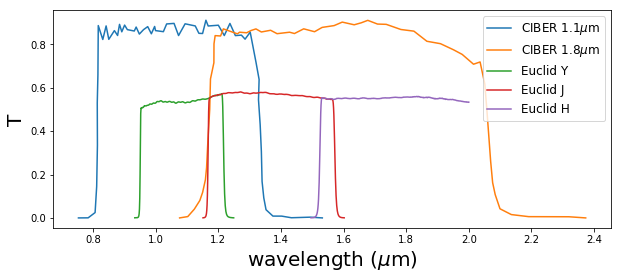

In [31]:
filtdir = mypaths['ciberdir'] + 'lephare/lephare_dev/filt/'

fig, ax = plt.subplots(1,1,figsize=(10,4))
for band,name in zip(['I','H'],['1.1', '1.8']):
    d = np.loadtxt(filtdir + 'ciber/' + band + '.pb',skiprows=1)
    ax.plot(d[:,0]/1e4,d[:,1],label='CIBER '+ name + r'$\mu$m')
for band in ['Y','J','H']:
    d = np.loadtxt(filtdir + 'euclid/Euclid_NISP.' + band + '.pb',skiprows=0)
    ax.plot(d[:,0]/1e4,d[:,1],label='Euclid '+band)
ax.set_xlabel(r'wavelength ($\mu$m)', fontsize=20)
ax.set_ylabel('T', fontsize=20)
ax.legend(fontsize=12)
fig.savefig('plots/IHL/MC_filters.pdf', dpi = 100, bbox_inches='tight')

In [1]:
from micecat import *

icat = 0
df0 = get_micecat_df(icat, return_full=True)

icat = 15
df = get_micecat_df(icat, return_full=True)
dfc = df[df['flag_central']==0]
dfs = df[df['flag_central']==1]

df.head()

MICECAT field 0, 0 < ra < 2, 0 < dec < 2
MICECAT field 15, 30 < ra < 32, 0 < dec < 2


unique_halo_id  flag_central  nsats     ra_gal   dec_gal   z_cgal  \
17       105769514             0      0  30.847807  1.070363  1.21108   
39       104024691             1     22  31.396451  1.124796  1.03955   
94        58758816             0      0  31.205311  0.287717  0.66125   
95        55753934             0      1  30.296206  0.303244  0.51417   
97       306570590             0      1  30.797569  0.150471  0.34092   

     lmhalo  lmstellar   lsfr  euclid_nisp_y_true  euclid_nisp_j_true  \
17  11.8361      9.704  0.665           22.547048           22.464048   
39  13.5317      9.800  1.388           23.476673           23.108673   
94  11.5721      9.427  0.716           21.850065           21.776065   
95  11.4648      9.169  0.876           21.642547           21.574547   
97  10.5616      8.105 -0.714           24.306952           24.061952   

    euclid_nisp_h_true          I          H           x           y  \
17           22.347048  22.547048  22.403973  434.515029  548.972400   
39           22.631673  23.476673  22.844185  716.674800  576.966514   
94           21.676065  21.850065  21.724914  618.374229  146.468743   
95           21.484547  21.642547  21.528615  150.834514  154.454057   
97           23.909952  24.306952  23.983294  408.678343   75.885086   

          M_I        M_H  
17 -21.264381 -21.407456  
39 -20.013271 -20.645758  
94 -20.657399 -20.782550  
95 -20.305407 -20.419339  
97 -16.718410 -17.042067

In [2]:
df.describe()

unique_halo_id   flag_central         nsats         ra_gal  \
count    3.957340e+05  395734.000000  395734.00000  395734.000000   
mean     1.415381e+08       0.349909      29.23348      30.972121   
std      9.342719e+07       0.476942     142.62814       0.573043   
min      1.243120e+05       0.000000       0.00000      30.000005   
25%      8.007989e+07       0.000000       0.00000      30.472948   
50%      1.056960e+08       0.000000       1.00000      30.962410   
75%      2.300817e+08       1.000000       3.00000      31.453502   
max      3.313852e+08       1.000000    2147.00000      31.999996   

             dec_gal         z_cgal         lmhalo      lmstellar  \
count  395734.000000  395734.000000  395734.000000  395734.000000   
mean        0.956646       0.685990      11.776657       9.176777   
std         0.580056       0.345097       0.884758       0.814690   
min         0.000029       0.072980      10.076900       6.624000   
25%         0.444557       0.389250      11.148800       8.602000   
50%         0.938813       0.678380      11.567600       9.213000   
75%         1.456671       0.959790      12.253700       9.753000   
max         1.999986       1.417070      14.626700      11.904000   

                lsfr  euclid_nisp_y_true  euclid_nisp_j_true  \
count  395734.000000       395734.000000       395734.000000   
mean        0.158042           22.670589           22.503900   
std         0.865248            1.248979            1.300254   
min        -4.188000           13.879860           13.538860   
25%        -0.373000           21.999004           21.790739   
50%         0.237000           22.910551           22.755518   
75%         0.791000           23.596154           23.469845   
max         2.688000           24.975503           25.024503   

       euclid_nisp_h_true              I              H              x  \
count       395734.000000  395734.000000  395734.000000  395734.000000   
mean            22.321493      22.670589      22.406641     498.447707   
std              1.364694       1.248979       1.334580     294.707578   
min             13.251860      13.879860      13.385904      -1.497429   
25%             21.554033      21.999004      21.663960     241.730400   
50%             22.570841      22.910551      22.657945     493.453714   
75%             23.337234      23.596154      23.400340     746.015186   
max             25.092503      24.975503      25.057971    1027.069371   

                   y            M_I            M_H  
count  395734.000000  395734.000000  395734.000000  
mean      490.489289     -19.549415     -19.813363  
std       298.314712       1.792620       1.875177  
min        -1.485086     -24.672863     -25.127130  
25%       227.129186     -20.897089     -21.205428  
50%       481.318114     -19.833471     -20.068550  
75%       747.645343     -18.445422     -18.587554  
max      1027.064229     -13.848084     -13.759777

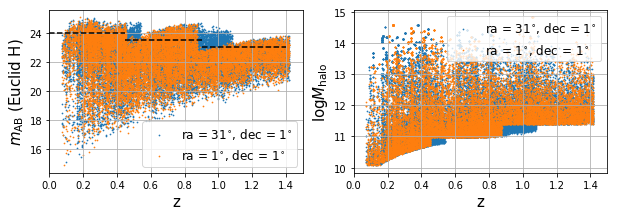

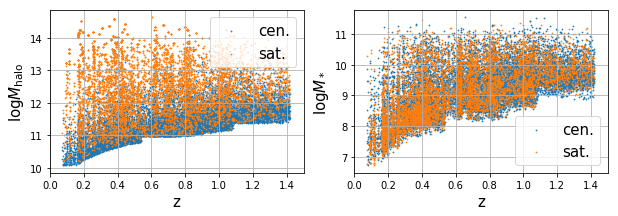

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].scatter(df['z_cgal'][::20], df['euclid_nisp_h_true'][::20],s=0.5, 
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df['ra_gal'])), round(np.median(df['dec_gal']))))
ax[0].scatter(df0['z_cgal'][::20], df0['euclid_nisp_h_true'][::20],s=0.5,
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df0['ra_gal'])), round(np.median(df0['dec_gal']))))
ax[0].plot([0,0.45],[24,24],'k--')
ax[0].plot([0.45,0.9],[23.5,23.5],'k--')
ax[0].plot([0.9,1.4],[23,23],'k--')
ax[0].set_xlabel('z',fontsize=15)
ax[0].set_ylabel(r'$m_{\rm AB}$ (Euclid H)',fontsize=15)
ax[0].grid()
ax[0].set_xlim([0,1.5])
ax[0].legend(fontsize=12)

ax[1].scatter(df['z_cgal'][::20], df['lmhalo'][::20],s=0.5, 
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df['ra_gal'])), round(np.median(df['dec_gal']))))
ax[1].scatter(df0['z_cgal'][::20], df0['lmhalo'][::20],s=0.5,
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df0['ra_gal'])), round(np.median(df0['dec_gal']))))
ax[1].set_xlabel('z',fontsize=15)
ax[1].set_ylabel(r'log$M_{\rm halo}$',fontsize=15)
ax[1].grid()
ax[1].set_xlim([0,1.5])
ax[1].legend(fontsize=12)
fig.savefig('plots/IHL/MC_fields.png', dpi = 200, bbox_inches='tight')

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].scatter(dfc['z_cgal'][::20],dfc['lmhalo'][::20],s=0.5, label='cen.')
ax[0].scatter(dfs['z_cgal'][::20],dfs['lmhalo'][::20],s=0.5, label='sat.')
ax[0].set_xlabel('z',fontsize=15)
ax[0].set_ylabel(r'log$M_{\rm halo}$',fontsize=15)
ax[0].grid()
ax[0].set_xlim([0,1.5])
ax[0].legend(fontsize=15)
ax[1].scatter(dfc['z_cgal'][::20],dfc['lmstellar'][::20],s=0.5, label='cen.')
ax[1].scatter(dfs['z_cgal'][::20],dfs['lmstellar'][::20],s=0.5, label='sat.')
ax[1].set_xlabel('z',fontsize=15)
ax[1].set_ylabel(r'log$M_*$',fontsize=15)
ax[1].grid()
ax[1].set_xlim([0,1.5])
ax[1].legend(fontsize=15)
fig.savefig('plots/IHL/MC_censat.png', dpi = 200, bbox_inches='tight')

*** 
SDSS LF Blanton 2003
https://iopscience.iop.org/article/10.1086/375776/pdf


In [12]:
from micecat_auto import *

fname = 'ra%d_%d_dec%d_%d_full'%(40,50,0,4)
fname = mypaths['MCcatdat'] + fname + '.csv.bz2'
with bz2.BZ2File(fname) as catalog_fd:
    df = pd.read_csv(catalog_fd, sep=",", index_col=False,
                     comment='#', na_values=r'\N')
    
fname = 'ra%d_%d_dec%d_%d_MC1'%(40,50,0,4)
fname = mypaths['MCcatdat'] + fname + '.csv.bz2'
with bz2.BZ2File(fname) as catalog_fd:
    df_mc1 = pd.read_csv(catalog_fd, sep=",", index_col=False,
                     comment='#', na_values=r'\N')

### Check consistency of MICECAT, SDSS, Helgason

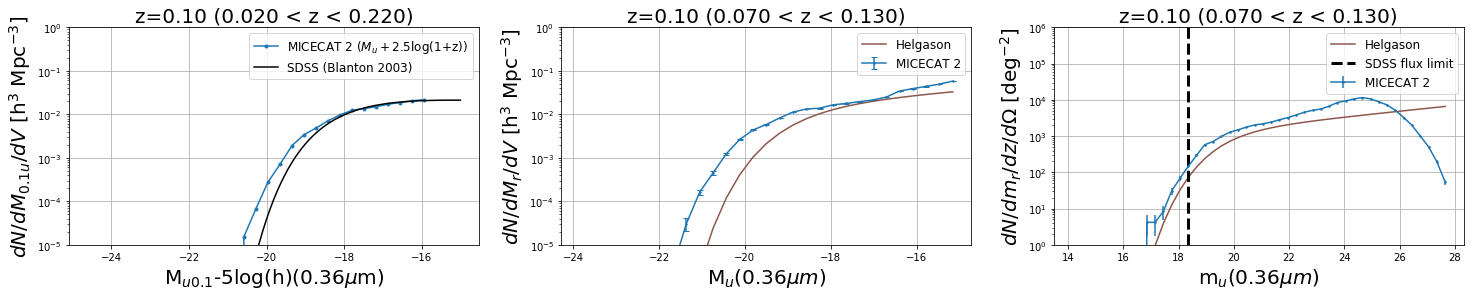

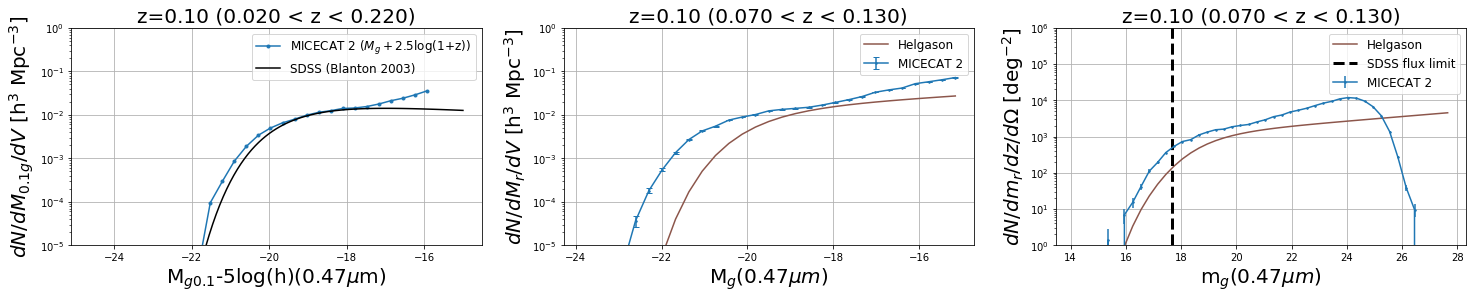

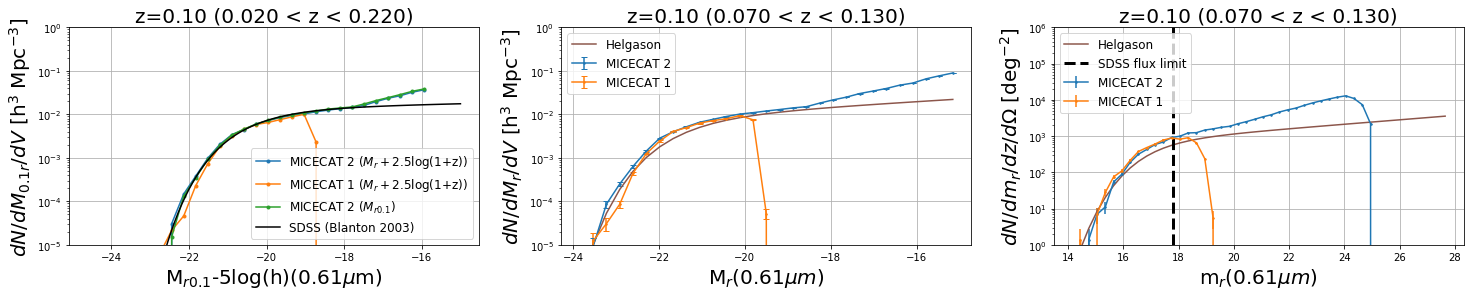

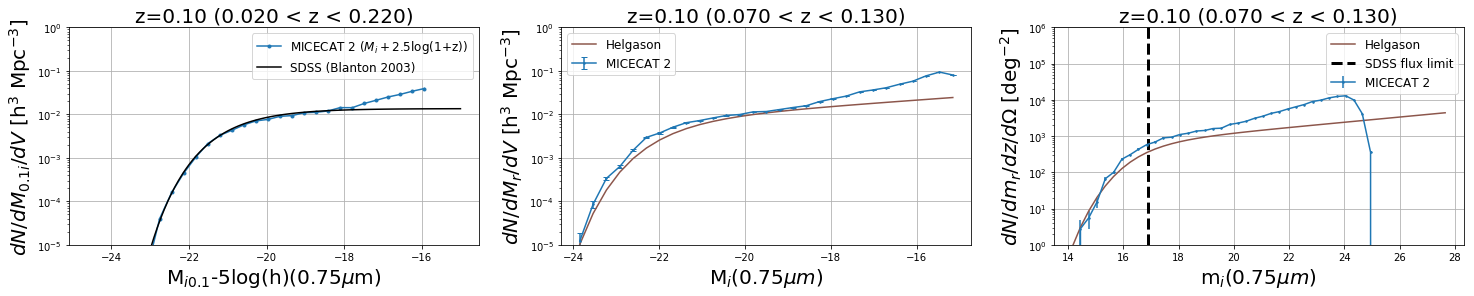

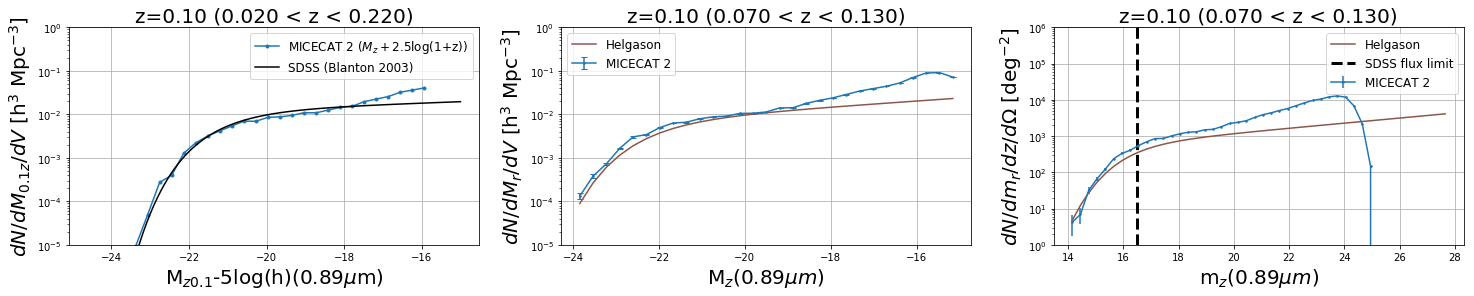

In [14]:
from Helgason import *

Blanton_dict = {}
Blanton_dict['u'] = {'wl':0.360804, 'm_lim':18.36, 'z_min':0.02, 'z_max':0.14,
                     'phi_str':3.05, 'M_str':-17.93, 'alpha':-0.92}
Blanton_dict['g'] = {'wl':0.467178, 'm_lim':17.69, 'z_min':0.02, 'z_max':0.17,
                     'phi_str':2.18, 'M_str':-19.39, 'alpha':-0.89}
Blanton_dict['r'] = {'wl':0.614112, 'm_lim':17.79, 'z_min':0.02, 'z_max':0.22,
                     'phi_str':1.49, 'M_str':-20.44, 'alpha':-1.05}
Blanton_dict['i'] = {'wl':0.745789, 'm_lim':16.91, 'z_min':0.02, 'z_max':0.22,
                     'phi_str':1.47, 'M_str':-20.82, 'alpha':-1.00}
Blanton_dict['z'] = {'wl':0.892278, 'm_lim':16.50, 'z_min':0.02, 'z_max':0.22,
                     'phi_str':1.35, 'M_str':-21.18, 'alpha':-1.08}

ra_min, ra_max = 40, 50
dec_min, dec_max = 0, 4
Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)

for band in ['u','g','r','i','z']:
    bandwl = Blanton_dict[band]['wl']

    fig, ax = plt.subplots(1,3,figsize=(25,4))

    # ==================================
    z_mid = 0.1
    z_min, z_max = 0.02,0.22
    dfi = df[(df.z_cgal<z_max) & (df.z_cgal>z_min)]
    dfi_mc1 = df_mc1[(df_mc1.z<z_max) & (df_mc1.z>z_min)]

    # get cmv volume
    Vcmv = 0 # (Mpc/h)^3
    zbinedges = np.linspace(np.min(dfi.zgal), np.max(dfi.zgal),100)
    for _,(z1, z2) in enumerate(zip(zbinedges[:-1], zbinedges[1:])):
        dfiz = dfi[(dfi.zgal>=z1) & (dfi.zgal<z2)]
        x1, x2 = np.min(dfiz.xgal), np.max(dfiz.xgal)
        y1, y2 = np.min(dfiz.ygal), np.max(dfiz.ygal)
        Vcmv += ((x2-x1) * (y2-y1) * (z2-z1))
    Vcmv *= 0.7**3

    # MICECAT
    Mrbinedges = np.linspace(-24,-15,30)+5*np.log10(0.7)
    Mrbins = (Mrbinedges[1:] + Mrbinedges[:-1]) / 2
    dM = Mrbinedges[1] - Mrbinedges[0]

    Mr = dfi['sdss_'+band+'_abs_mag'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
    Mr01 = Mr + +2.5*np.log10(1+dfi.z_cgal.values)
    phi_mc2 = np.histogram(Mr01, bins=Mrbinedges)[0]/dM/Vcmv
    ax[0].semilogy(Mrbins, phi_mc2,'.-',label='MICECAT 2 ($M_{%s}+$2.5log(1+z))'%band)

    if band == 'r':
        Mr = dfi_mc1['abs_mag_'+band] - 0.8 * (np.arctan(1.5 * dfi_mc1.z.values) - 0.1489)
        Mr01 = Mr +2.5*np.log10(1+dfi_mc1.z.values)
        phi_mc1 = np.histogram(Mr01, bins=Mrbinedges)[0]/dM/Vcmv
        ax[0].semilogy(Mrbins, phi_mc1,'.-',label='MICECAT 1 ($M_{r}+$2.5log(1+z))')

        Mr01 = dfi.sdss_r01_abs_mag.values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
        phi_mc = np.histogram(Mr01, bins=Mrbinedges)[0]/dM/Vcmv
        ax[0].semilogy(Mrbins, phi_mc,'.-',label='MICECAT 2 ($M_{r0.1}$)')

    # SDSS Blanton
    phi_str = Blanton_dict[band]['phi_str']*1e-2 # (h/Mpc)^3
    M_str = Blanton_dict[band]['M_str'] + 5 * np.log10(0.7)
    alpha = Blanton_dict[band]['alpha']

    Mrbins = np.linspace(-24,-15,100)+5*np.log10(0.7)
    phi_arr = 0.4*np.log(10)*phi_str*(10**(0.4*(M_str-Mrbins)))**(alpha+1)*np.exp(-10**(0.4*(M_str-Mrbins)))
    ax[0].semilogy(Mrbins-5 * np.log10(0.7), phi_arr, 'k', label='SDSS (Blanton 2003)')

    ax[0].grid()
    ax[0].set_ylim([1e-5,1e0])
    ax[0].set_ylabel(r'$dN/dM_{0.1%s}/dV$ [h$^3$ Mpc$^{-3}$]'%band,fontsize=20)
    ax[0].set_xlabel(r'M$_{%s0.1}$-5log(h)(%.2f$\mu$m)'%(band,bandwl), fontsize=20)
    ax[0].set_title('z={:.2f} ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=20)
    ax[0].legend(fontsize=12)

    # =================
    z_min, z_max = 0.07,0.13
    z_mid = (z_min + z_max) / 2

    # get cmv volume
    Vcmv = 0 # (Mpc/h)^3
    zbinedges = np.linspace(np.min(dfi.zgal), np.max(dfi.zgal),100)
    for _,(z1, z2) in enumerate(zip(zbinedges[:-1], zbinedges[1:])):
        dfiz = dfi[(dfi.zgal>=z1) & (dfi.zgal<z2)]
        x1, x2 = np.min(dfiz.xgal), np.max(dfiz.xgal)
        y1, y2 = np.min(dfiz.ygal), np.max(dfiz.ygal)
        Vcmv += ((x2-x1) * (y2-y1) * (z2-z1))
    Vcmv *= 0.7**3

    Mrbinedges = np.linspace(-24,-15,30)
    Mrbins = (Mrbinedges[1:] + Mrbinedges[:-1]) / 2
    dM = Mrbinedges[1] - Mrbinedges[0]

    Mr = dfi['sdss_'+band+'_abs_mag'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
    Mr = Mr + 5*np.log10(0.7)
    phi_mc = np.histogram(Mr, bins=Mrbinedges)[0]
    phi_mc_err = np.sqrt(phi_mc)
    phi_mc, phi_mc_err = phi_mc/dM/Vcmv, phi_mc_err/dM/Vcmv # (h/Mpc)^3
    ax[1].errorbar(Mrbins, phi_mc, phi_mc_err,capsize=3, fmt='.-', markersize=3,label='MICECAT 2')

    if band == 'r':
        Mr = dfi_mc1['abs_mag_'+band].values - 0.8 * (np.arctan(1.5 * dfi_mc1.z.values) - 0.1489)
        Mr = Mr + 5*np.log10(0.7)
        phi_mc1 = np.histogram(Mr, bins=Mrbinedges)[0]
        phi_mc_err1 = np.sqrt(phi_mc1)
        phi_mc1, phi_mc_err1 = phi_mc1/dM/Vcmv, phi_mc_err1/dM/Vcmv # (h/Mpc)^3
        ax[1].errorbar(Mrbins, phi_mc1, phi_mc_err1,capsize=3, fmt='.-', markersize=3,label='MICECAT 1')

    phi_h = Helgason_model().LF_wl(z_mid, bandwl/(1+z_mid), Mrbins)[1]/0.7**3# (h/Mpc)^3
    ax[1].semilogy(Mrbins, phi_h,'C5',label='Helgason')

    ax[1].grid()
    ax[1].set_ylim([1e-5,1e0])
    ax[1].set_ylabel(r'$dN/dM_{r}/dV$ [h$^3$ Mpc$^{-3}$]',fontsize=20)
    ax[1].set_xlabel(r'M$_{%s}(%.2f\mu m)$'%(band,bandwl), fontsize=20)
    ax[1].set_title('z={:.2f} ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=20)
    ax[1].legend(fontsize=12)

    # # =================
    mbinedges = np.arange(14,28,0.3)
    mbins = (mbinedges[1:] + mbinedges[:-1])/2

    dfi = df[(df.z_cgal>=z_min) & (df.z_cgal<z_max)]
    mr = dfi['sdss_'+band+'_true'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
    dN_dm_ddeg2m = np.histogram(mr, bins=mbinedges)[0]
    dN_dm_ddeg2m_err = np.sqrt(dN_dm_ddeg2m)
    dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
    dN_dm_ddeg2m_err = dN_dm_ddeg2m_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
    ax[2].errorbar(mbins, dN_dm_ddeg2m, dN_dm_ddeg2m_err, fmt='.-', markersize=3,label='MICECAT 2')

    if band == 'r':
        dfi_mc1 = df_mc1[(df_mc1.z<z_max) & (df_mc1.z>z_min)]
        mr = dfi_mc1[band+'_sdss_true'].values - 0.8 * (np.arctan(1.5 * dfi_mc1.z.values) - 0.1489)
        dN_dm_ddeg2m = np.histogram(mr, bins=mbinedges)[0]
        dN_dm_ddeg2m_err = np.sqrt(dN_dm_ddeg2m)
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2m_err = dN_dm_ddeg2m_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[2].errorbar(mbins, dN_dm_ddeg2m, dN_dm_ddeg2m_err, fmt='.-', markersize=3,label='MICECAT 1')

    dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,zmin=z_min,zmax=z_max,m_min=m_min,m_max=m_max) \
                    for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
    dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / (z_max - z_min)
    dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)
    ax[2].semilogy(mbins, dN_dm_ddeg2h,'C5',label='Helgason')
    ax[2].axvline(Blanton_dict[band]['m_lim'],c='k',ls='--',lw=3,label='SDSS flux limit')

    ax[2].set_ylim([1e0, 1e6])
    ax[2].grid()
    ax[2].set_ylabel(r'$dN/dm_{r}/dz/d\Omega$ [deg$^{-2}$]',fontsize=20)
    ax[2].set_xlabel(r'm$_{%s}(%.2f\mu m)$'%(band,bandwl), fontsize=20)
    ax[2].set_title('z={:.2f} ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=20)
    ax[2].legend(fontsize=12)
    
    fig.savefig('plots/IHL/LF_SDSS_%s.pdf'%band, dpi = 100, bbox_inches='tight')

### MICECAT vs Helgason LF across MICECAT redshift

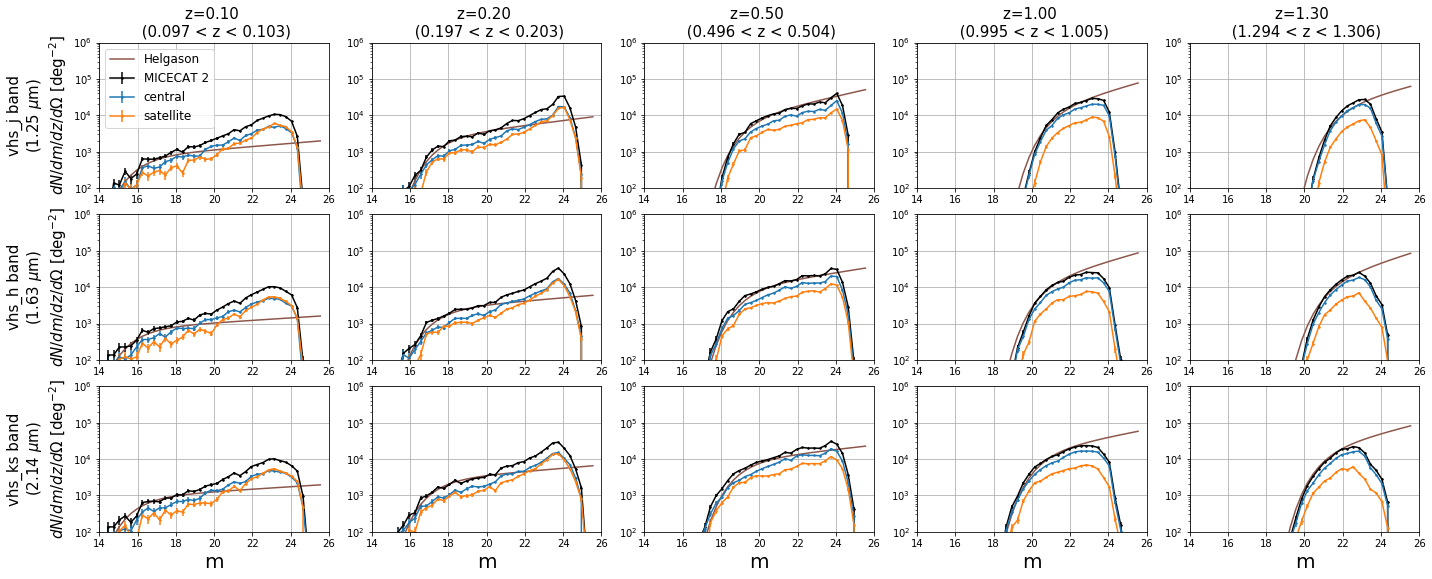

In [15]:
from Helgason import *

bandwl_dict = {'sdss_u':0.360804, 'sdss_g':0.467178, 'sdss_r':0.614112, 
               'sdss_i':0.745789, 'sdss_z':0.892278,
               'vhs_j':1.248100, 'vhs_h':1.634819, 'vhs_ks':2.143546}

fig, ax = plt.subplots(3,5,figsize=(20,10))
for iz,z_mid in enumerate([0.1, 0.2, 0.5, 1, 1.3]):
# for iz,z_mid in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    delz = 0.005
    Dz = (1 + z_mid) * delz
    z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

    dfi = df[(df.z_cgal<z_max) & (df.z_cgal>z_min)]
    dfi_cen = dfi[dfi.flag_central==0]
    dfi_sat = dfi[dfi.flag_central==1]
    ra_min, ra_max = 40, 50
    dec_min, dec_max = 0, 4
    Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)
    mbinedges = np.arange(14,26,0.3)
    mbins = (mbinedges[1:] + mbinedges[:-1])/2

    dfi = df[(df.z_cgal>=z_min) & (df.z_cgal<z_max)]
    sp_cen = np.where(dfi.flag_central==0)[0]
    sp_sat = np.where(dfi.flag_central==1)[0]
    for i, band_name in enumerate(['vhs_j','vhs_h','vhs_ks']):
        bandwl = bandwl_dict[band_name]
        
        mr = dfi[band_name+'_true'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
        mr_cen, mr_sat = mr[sp_cen], mr[sp_sat]
        dN_dm_ddeg2m = np.histogram(mr, bins=mbinedges)[0]
        dN_dm_ddeg2m_err = np.sqrt(dN_dm_ddeg2m)
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2m_err = dN_dm_ddeg2m_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i][iz].errorbar(mbins, dN_dm_ddeg2m, dN_dm_ddeg2m_err, c='k', fmt='.-',
                           markersize=3,label='MICECAT 2')

        dN_dm_ddeg2m = np.histogram(mr_cen, bins=mbinedges)[0]
        dN_dm_ddeg2m_err = np.sqrt(dN_dm_ddeg2m)
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2m_err = dN_dm_ddeg2m_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i][iz].errorbar(mbins, dN_dm_ddeg2m, dN_dm_ddeg2m_err, c='C0', fmt='.-',
                           markersize=3,label='central')

        dN_dm_ddeg2m = np.histogram(mr_sat, bins=mbinedges)[0]
        dN_dm_ddeg2m_err = np.sqrt(dN_dm_ddeg2m)
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2m_err = dN_dm_ddeg2m_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i][iz].errorbar(mbins, dN_dm_ddeg2m, dN_dm_ddeg2m_err, c='C1', fmt='.-',
                           markersize=3,label='satellite')

        dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,zmin=z_min,zmax=z_max,m_min=m_min,m_max=m_max) \
                        for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / (z_max - z_min)
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)
        ax[i][iz].semilogy(mbins, dN_dm_ddeg2h,'C5',label='Helgason')
        ax[i][iz].set_ylim([1e2, 1e6])
        ax[i][iz].set_xlim([14, 26])
        ax[i][iz].grid()
        ax[i][0].set_ylabel(r'%s band'%(band_name)+'\n'+r'(%.2f $\mu$m)'%(bandwl)\
                            +'\n'+r'$dN/dm/dz/d\Omega$ [deg$^{-2}$]',fontsize=15)
    ax[-1][iz].set_xlabel(r'm', fontsize=20)
    ax[0][iz].set_title('z={:.2f} \n ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=15)
ax[0][0].legend(fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.75)
fig.savefig('plots/IHL/LF_VHS.pdf', dpi = 100, bbox_inches='tight')

### MICECAT vs Helgason LF at low-z and the source properties

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in true_divide


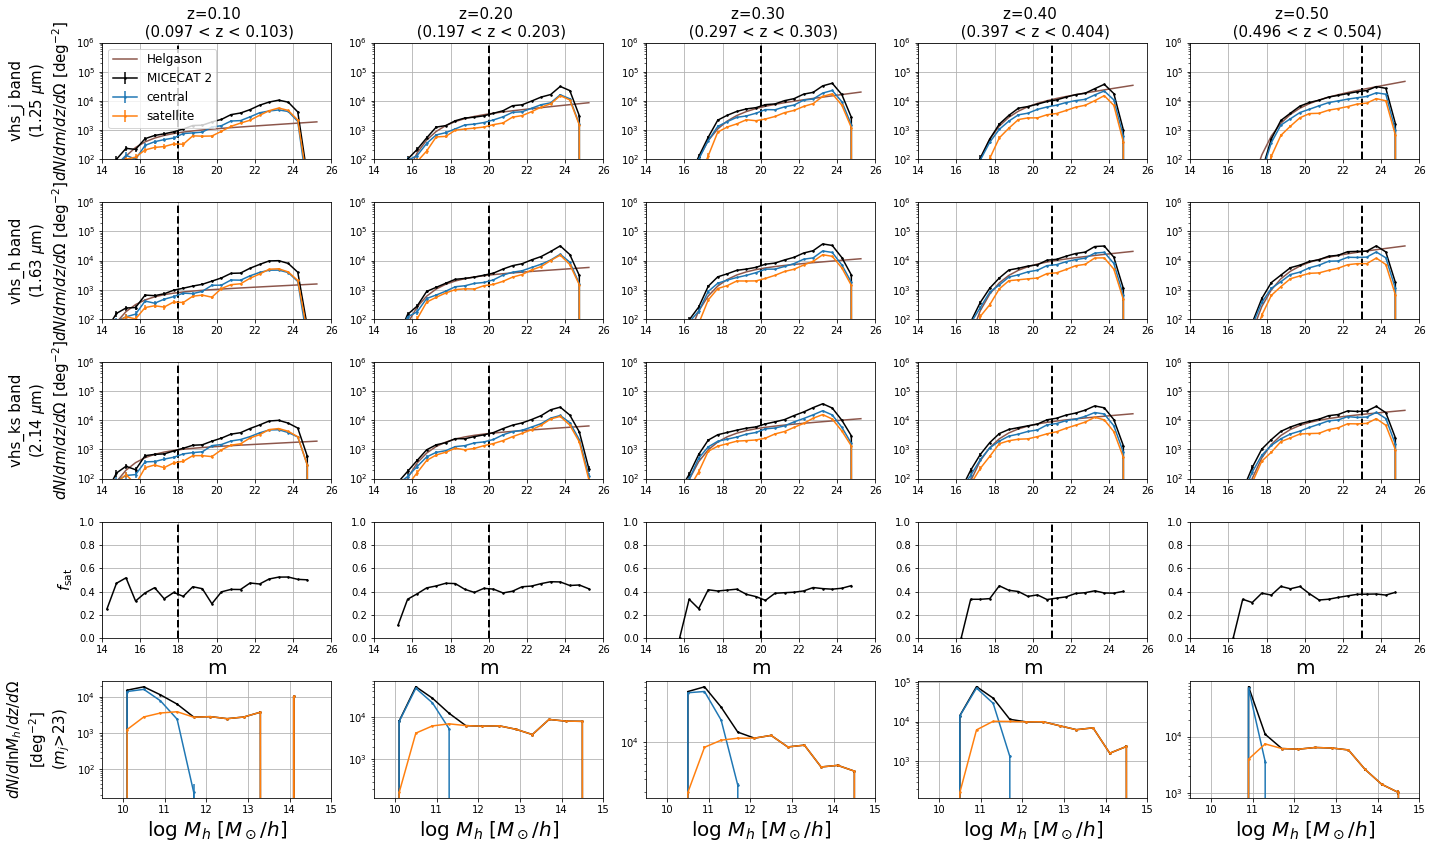

In [22]:
from Helgason import *

bandwl_dict = {'sdss_u':0.360804, 'sdss_g':0.467178, 'sdss_r':0.614112, 
               'sdss_i':0.745789, 'sdss_z':0.892278,
               'vhs_j':1.248100, 'vhs_h':1.634819, 'vhs_ks':2.143546}

fig, ax = plt.subplots(5,5,figsize=(20,15))
for iz,(z_mid,m_lim) in enumerate(zip([0.1, 0.2, 0.3, 0.4, 0.5],[18,20,20,21,23])):
    delz = 0.005
    Dz = (1 + z_mid) * delz
    z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

    dfi = df[(df.z_cgal<z_max) & (df.z_cgal>z_min)]
    dfi_cen = dfi[dfi.flag_central==0]
    dfi_sat = dfi[dfi.flag_central==1]
    ra_min, ra_max = 40, 50
    dec_min, dec_max = 0, 4
    Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)
    mbinedges = np.arange(14,26,0.5)
    mbins = (mbinedges[1:] + mbinedges[:-1])/2

    dfi = df[(df.z_cgal>=z_min) & (df.z_cgal<z_max)]
    sp_cen = np.where(dfi.flag_central==0)[0]
    sp_sat = np.where(dfi.flag_central==1)[0]
    for i, band_name in enumerate(['vhs_j','vhs_h','vhs_ks']):
        bandwl = bandwl_dict[band_name]
        
        mr = dfi[band_name+'_true'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
        mr_cen, mr_sat = mr[sp_cen], mr[sp_sat]
        dN_dm_ddeg2m = np.histogram(mr, bins=mbinedges)[0]
        dN_dm_ddeg2m_err = np.sqrt(dN_dm_ddeg2m)
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2m_err = dN_dm_ddeg2m_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i][iz].errorbar(mbins, dN_dm_ddeg2m, dN_dm_ddeg2m_err, c='k', fmt='.-',
                           markersize=3,label='MICECAT 2')

        dN_dm_ddeg2mc = np.histogram(mr_cen, bins=mbinedges)[0]
        dN_dm_ddeg2mc_err = np.sqrt(dN_dm_ddeg2mc)
        dN_dm_ddeg2mc = dN_dm_ddeg2mc / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2mc_err = dN_dm_ddeg2mc_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i][iz].errorbar(mbins, dN_dm_ddeg2mc, dN_dm_ddeg2mc_err, c='C0', fmt='.-',
                           markersize=3,label='central')

        dN_dm_ddeg2ms = np.histogram(mr_sat, bins=mbinedges)[0]
        dN_dm_ddeg2ms_err = np.sqrt(dN_dm_ddeg2ms)
        dN_dm_ddeg2ms = dN_dm_ddeg2ms / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        dN_dm_ddeg2ms_err = dN_dm_ddeg2ms_err / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i][iz].errorbar(mbins, dN_dm_ddeg2ms, dN_dm_ddeg2ms_err, c='C1', fmt='.-',
                           markersize=3,label='satellite')

        dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,zmin=z_min,zmax=z_max,m_min=m_min,m_max=m_max) \
                        for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / (z_max - z_min)
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)
        ax[i][iz].semilogy(mbins, dN_dm_ddeg2h,'C5',label='Helgason')
        ax[i][iz].set_ylim([1e2, 1e6])
        ax[i][iz].set_xlim([14, 26])
        ax[i][iz].grid()
        ax[i][0].set_ylabel(r'%s band'%(band_name)+'\n'+r'(%.2f $\mu$m)'%(bandwl)\
                            +'\n'+r'$dN/dm/dz/d\Omega$ [deg$^{-2}$]',fontsize=15)
        ax[i][iz].axvline(m_lim, c='k', lw=2, ls='--')
        
    ax[3][iz].plot(mbins, dN_dm_ddeg2ms/dN_dm_ddeg2m, 'k.-', markersize=3)
    ax[3][iz].axvline(m_lim, c='k', lw=2, ls='--')
    ax[3][iz].set_ylim([0,1])
    ax[3][iz].set_xlim([14, 26])
    ax[3][iz].grid()
    ax[3][0].set_ylabel(r'$f_{\rm sat}$',fontsize=15)
    
    dfi = dfi[dfi.vhs_j_true > m_lim]
    lnMhbinedges = np.arange(9.5,15.5, 0.4)
    lnMhbins = (lnMhbinedges[1:] + lnMhbinedges[:-1]) / 2
    sp_cen = np.where(dfi.flag_central==0)[0]
    sp_sat = np.where(dfi.flag_central==1)[0]
    lnMh_arr = dfi.lmhalo.values
    lnMhc_arr = lnMh_arr[sp_cen]
    lnMhs_arr = lnMh_arr[sp_sat]
    
    dN_dm_dlnMh = np.histogram(lnMh_arr, bins=lnMhbinedges)[0]
    dN_dm_dlnMh_err = np.sqrt(dN_dm_dlnMh)
    dN_dm_dlnMh = dN_dm_dlnMh / np.diff(lnMhbinedges) / Omega_cat / (z_max - z_min)
    dN_dm_dlnMh_err = dN_dm_dlnMh_err / np.diff(lnMhbinedges) / Omega_cat / (z_max - z_min)
    ax[4][iz].errorbar(lnMhbins, dN_dm_dlnMh, dN_dm_dlnMh_err, c='k', fmt='.-',
                       markersize=3,label='total')

    dN_dm_dlnMhc = np.histogram(lnMh_arr[sp_cen], bins=lnMhbinedges)[0]
    dN_dm_dlnMhc_err = np.sqrt(dN_dm_dlnMhc)
    dN_dm_dlnMhc = dN_dm_dlnMhc / np.diff(lnMhbinedges) / Omega_cat / (z_max - z_min)
    dN_dm_dlnMhc_err = dN_dm_dlnMhc_err / np.diff(lnMhbinedges) / Omega_cat / (z_max - z_min)
    ax[4][iz].errorbar(lnMhbins, dN_dm_dlnMhc, dN_dm_dlnMhc_err, c='C0', fmt='.-',
                       markersize=3,label='central')
    
    dN_dm_dlnMhs = np.histogram(lnMh_arr[sp_sat], bins=lnMhbinedges)[0]
    dN_dm_dlnMhs_err = np.sqrt(dN_dm_dlnMhs)
    dN_dm_dlnMhs = dN_dm_dlnMhs / np.diff(lnMhbinedges) / Omega_cat / (z_max - z_min)
    dN_dm_dlnMhs_err = dN_dm_dlnMhs_err / np.diff(lnMhbinedges) / Omega_cat / (z_max - z_min)
    ax[4][iz].errorbar(lnMhbins, dN_dm_dlnMhs, dN_dm_dlnMhs_err, c='C1', fmt='.-',
                       markersize=3,label='satellite')
#     ax[4][iz].set_ylim([0,1])
    ax[4][iz].set_xlim([9.5,15])
    ax[4][iz].grid()
    ax[4][iz].set_yscale('log')
    ax[4][0].set_ylabel(r'$dN/d{\rm ln}M_h/dz/d\Omega$'+\
                        '\n'+r'[deg$^{-2}$]'+'\n'+r'($m_j$>%d)'%m_lim,fontsize=15)
    ax[4][iz].set_xlabel(r'log $M_h$ [$M_\odot/h$]', fontsize=20)
    
    ax[-2][iz].set_xlabel(r'm', fontsize=20)
    ax[0][iz].set_title('z={:.2f} \n ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=15)
ax[0][0].legend(fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.75)

### MICECAT vs Helgason mag-cumulative IGL

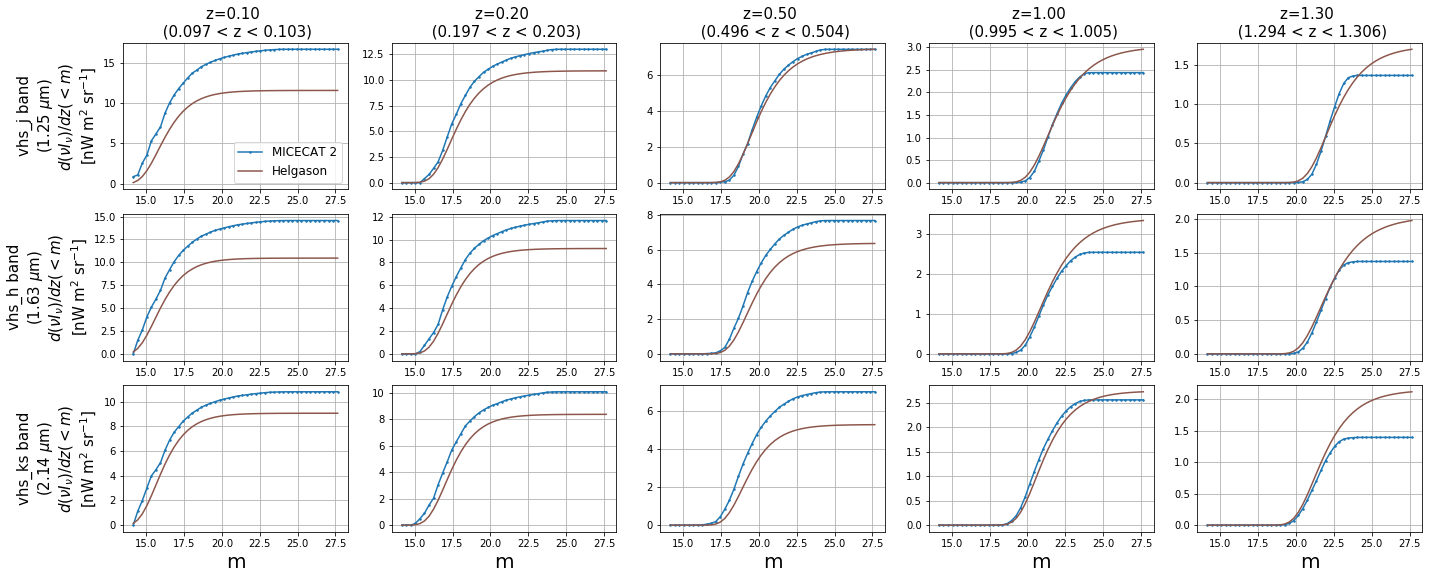

In [17]:
from Helgason import *

bandwl_dict = {'sdss_u':0.360804, 'sdss_g':0.467178, 'sdss_r':0.614112, 
               'sdss_i':0.745789, 'sdss_z':0.892278,
               'vhs_j':1.248100, 'vhs_h':1.634819, 'vhs_ks':2.143546}

ra_min, ra_max = 40, 50
dec_min, dec_max = 0, 4
Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)
mbinedges = np.arange(14,28,0.3)
mbins = (mbinedges[1:] + mbinedges[:-1])/2
dm = mbinedges[1] - mbinedges[0]
Inus = (3631 * 10**(-mbins / 2.5) / Omega_cat) * (u.Jy/u.deg**2).to(u.nW/u.m**2/u.Hz/u.sr)

fig, ax = plt.subplots(3,5,figsize=(20,10))
for iz,z_mid in enumerate([0.1, 0.2, 0.5, 1, 1.3]):
    delz = 0.005
    Dz = (1 + z_mid) * delz
    z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

    dfi = df[(df.z_cgal>=z_min) & (df.z_cgal<z_max)]

    for i, band_name in enumerate(['vhs_j','vhs_h','vhs_ks']):
        bandwl = bandwl_dict[band_name]
        nuInus = Inus * (bandwl * u.um).to(u.Hz, equivalencies=u.spectral()).value # nW/m2/sr
        mr = dfi[band_name+'_true'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
        dN_dm_ddeg2m = np.histogram(mr, bins=mbinedges)[0]
        dnuInu_dz_dm = dN_dm_ddeg2m * nuInus / (z_max - z_min) / dm # dnuInu/dz/dm
        ax[i][iz].plot(mbins, np.cumsum(dnuInu_dz_dm*dm), '.-', markersize=3,label='MICECAT 2')

        dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,zmin=z_min,zmax=z_max,m_min=m_min,m_max=m_max) \
                        for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) * Omega_cat / (u.sr).to(u.deg**2)
        dnuInu_dz_dh = dN_dm_ddeg2h * nuInus / (z_max - z_min) / dm # dnuInu/dz/dm
        ax[i][iz].plot(mbins, np.cumsum(dnuInu_dz_dh*dm),'C5',label='Helgason')
        ax[i][iz].grid()
        ax[i][0].set_ylabel(r'%s band'%(band_name)+'\n'+r'(%.2f $\mu$m)'%(bandwl)\
                            +'\n'+r'$d(\nu I_\nu)/dz(<m)$ '+'\n'+r'[nW m$^2$ sr$^{-1}$]',fontsize=15)
    ax[-1][iz].set_xlabel(r'm', fontsize=20)
    ax[0][iz].set_title('z={:.2f} \n ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=15)
ax[0][0].legend(fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.75)
fig.savefig('plots/IHL/LFcum_VHS_mag.pdf', dpi = 100, bbox_inches='tight')

### MICECAT vs Helgason redshift-cumulative IGL

Can also add obs constraints, e.g. Drivers et al.

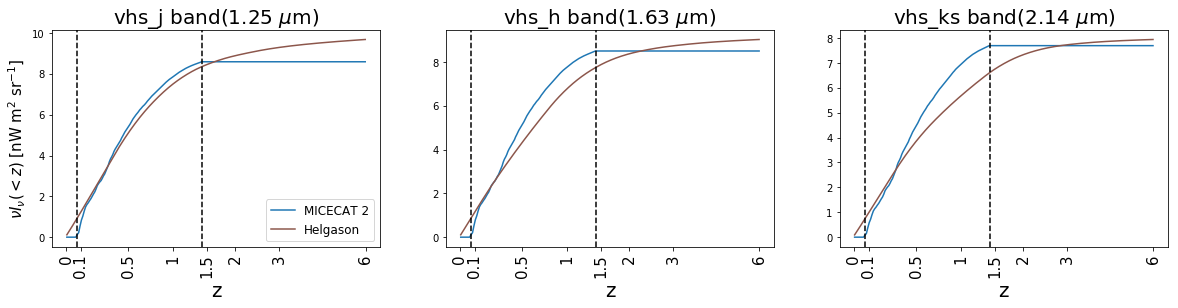

In [16]:
from Helgason import *

bandwl_dict = {'sdss_u':0.360804, 'sdss_g':0.467178, 'sdss_r':0.614112, 
               'sdss_i':0.745789, 'sdss_z':0.892278,
               'vhs_j':1.248100, 'vhs_h':1.634819, 'vhs_ks':2.143546}

ra_min, ra_max = 40, 50
dec_min, dec_max = 0, 4
Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)
zbinedges = np.arange(0,6,0.01)
zbins = (zbinedges[1:] + zbinedges[:-1])/2
dz = zbinedges[1] - zbinedges[0]

fig, ax = plt.subplots(1,3,figsize=(20,4))

for i, band_name in enumerate(['vhs_j','vhs_h','vhs_ks']):
    bandwl = bandwl_dict[band_name]
    bandnu = (bandwl * u.um).to(u.Hz, equivalencies=u.spectral()).value # Hz
    m_arr = df[band_name+'_true'].values - 0.8 * (np.arctan(1.5 * df.z_cgal.values) - 0.1489)
    nuFnu_arr = bandnu * (3631 * 10**(-m_arr / 2.5)) * (u.Jy*u.Hz).to(u.nW/u.m**2)
    nuInu_arr = nuFnu_arr / (Omega_cat * (u.deg**2).to(u.sr)) # nW/m2/sr
    z_arr = df.z_cgal.values
    dnuInu_dzm = np.histogram(z_arr, bins=zbinedges, weights=nuInu_arr)[0] / dz
    
    ax[i].plot(np.log10(1+zbins), np.cumsum(dnuInu_dzm*dz), 'C0-', label='MICECAT 2')

    dnuInu_dzh = np.array([Helgason_model().dnuInu_dz(z,bandwl) for z in zbins]) # nW/m2/sr
    ax[i].plot(np.log10(1+zbins), np.cumsum(dnuInu_dzh*dz), 'C5-', label='Helgason')
    ax[i].set_title(r'%s band'%(band_name)+r'(%.2f $\mu$m)'%(bandwl), fontsize=20)
    ax[i].set_xticks(np.log10(1+np.array([0,0.1,0.5,1,1.5,2,3,6])))
    ax[i].set_xticklabels(['0','0.1','0.5','1','1.5','2','3','6'],rotation=90,fontsize=15)
    ax[i].set_xlabel('z', fontsize=20)
    ax[i].axvline(np.log10(1+min(z_arr)),c='k',ls='--')
    ax[i].axvline(np.log10(1+max(z_arr)),c='k',ls='--')
ax[0].legend(fontsize=12)
ax[0].set_ylabel(r'$\nu I_\nu(<z)$ [nW m$^2$ sr$^{-1}$]',fontsize=15)
fig.savefig('plots/IHL/LFcum_VHS_z.pdf', dpi = 100, bbox_inches='tight')

### MICECAT vs Helgason LF in SDSS bands

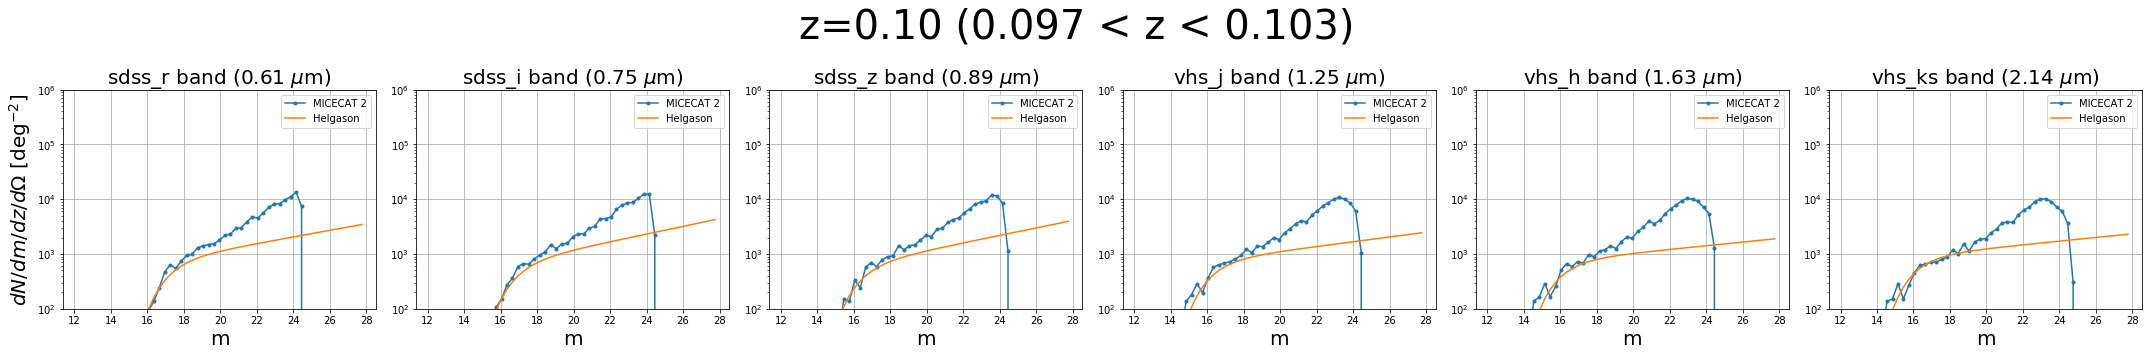

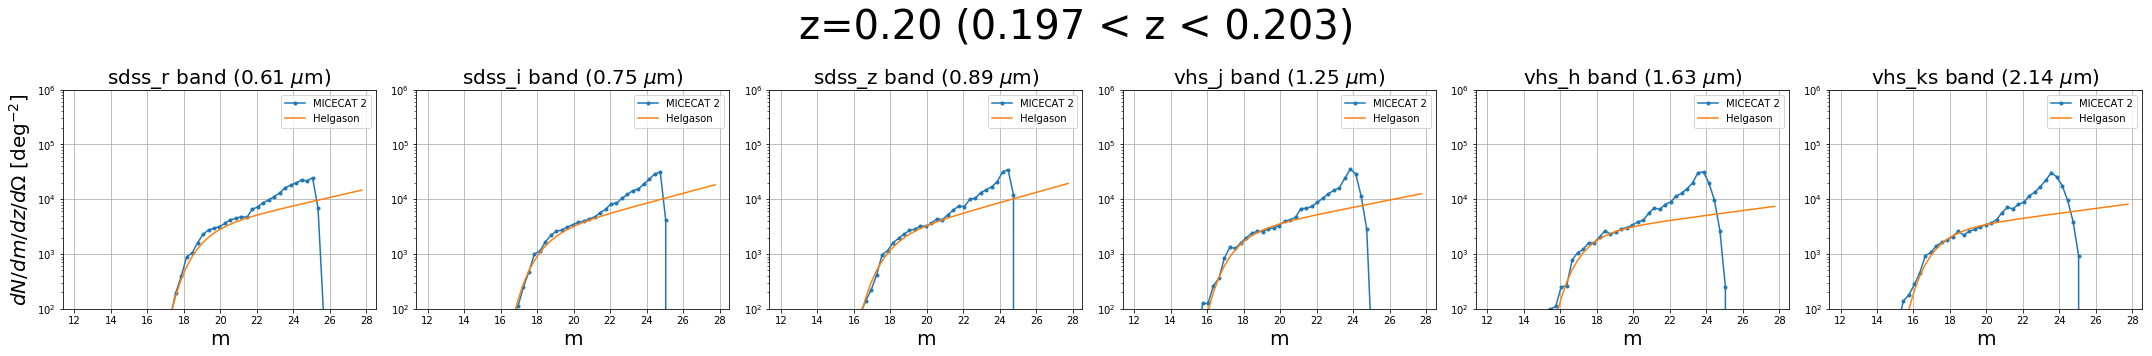

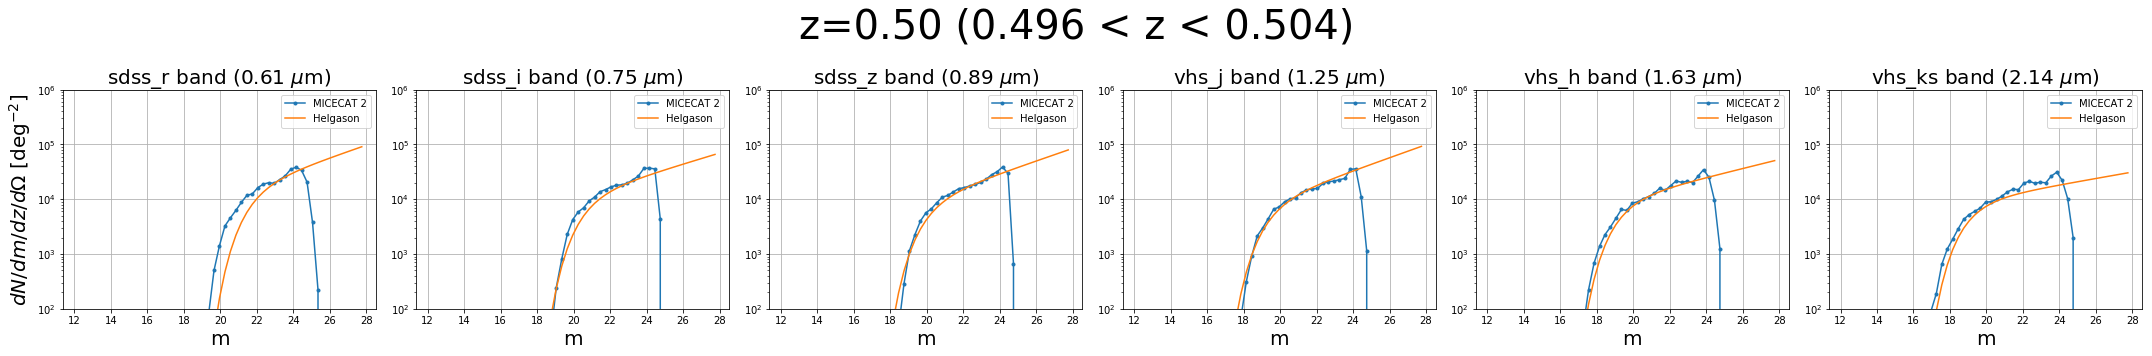

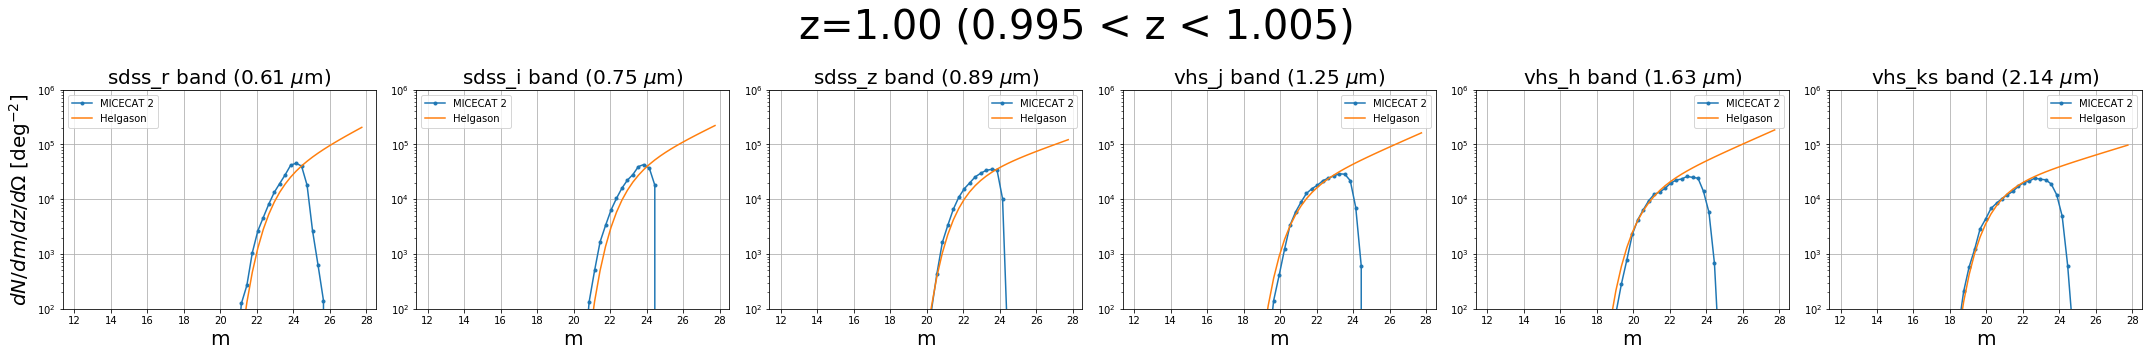

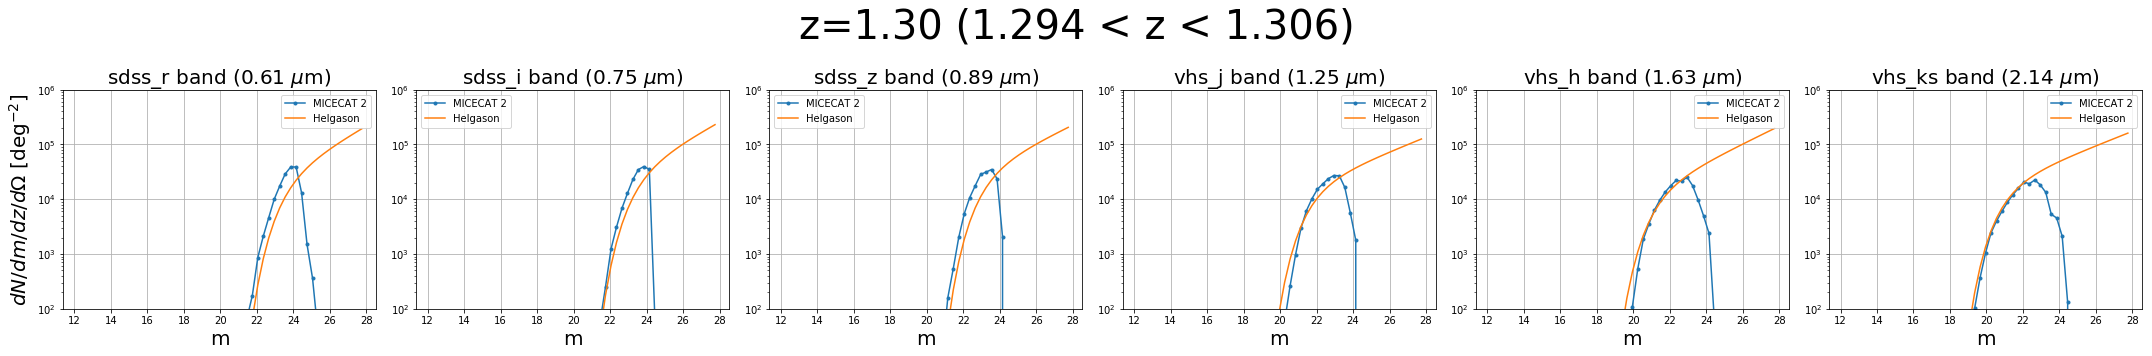

In [5]:
from Helgason import *

for z_mid in [0.1, 0.2, 0.5, 1, 1.3]:
    delz = 0.005
    Dz = (1 + z_mid) * delz
    z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

    dfi = df[(df.z_cgal<z_max) & (df.z_cgal>z_min)]

    ra_min, ra_max = 40, 50
    dec_min, dec_max = 0, 4
    Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)
    mbinedges = np.arange(12,28,0.3)
    mbins = (mbinedges[1:] + mbinedges[:-1])/2

    dfi = df[(df.z_cgal>=z_min) & (df.z_cgal<z_max)]

    fig, ax = plt.subplots(1,6,figsize=(30,5))
    bandwl_dict = {'sdss_u':0.360804, 'sdss_g':0.467178, 'sdss_r':0.614112, 
                   'sdss_i':0.745789, 'sdss_z':0.892278,
                   'vhs_j':1.248100, 'vhs_h':1.634819, 'vhs_ks':2.143546}

    for i, band_name in enumerate(['sdss_r','sdss_i','sdss_z','vhs_j','vhs_h','vhs_ks']):
        bandwl = bandwl_dict[band_name]

        m = dfi[band_name + '_true'].values - 0.8 * (np.arctan(1.5 * dfi.z_cgal.values) - 0.1489)
        dN_dm_ddeg2m = np.histogram(m, bins=mbinedges)[0]
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)
        ax[i].semilogy(mbins, dN_dm_ddeg2m,'.-',label='MICECAT 2')

        dN_dm_ddeg2h = [Helgason_model().dN_dsr_dz((z_min+z_max)/2,bandwl,m_min=m_min,m_max=m_max) \
                        for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)
        ax[i].plot(mbins, dN_dm_ddeg2h,label='Helgason')
        ax[i].set_ylim([1e2, 1e6])
        ax[i].grid()
        ax[i].set_xlabel(r'm', fontsize=20)
        ax[i].set_title(r'%s band (%.2f $\mu$m)'%(band_name, bandwl), fontsize=20)
        ax[i].legend()
    ax[0].set_ylabel(r'$dN/dm/dz/d\Omega$ [deg$^{-2}$]',fontsize=20)

    fig.tight_layout()
    fig.subplots_adjust(top=0.75)
    fig.suptitle('z={:.2f} ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=40)

### MICECAT vs Helgason cumulative IGL in broad z bins

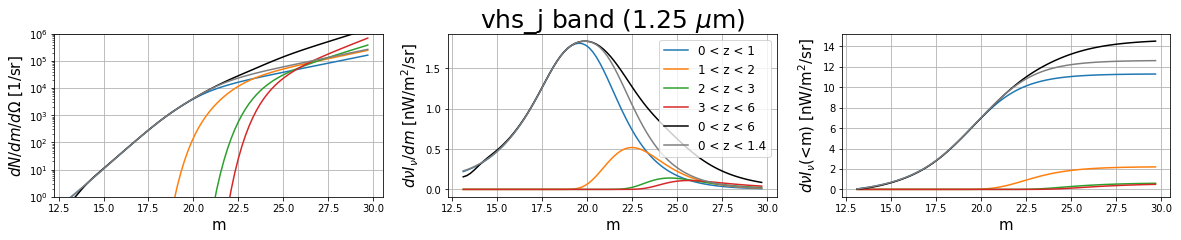

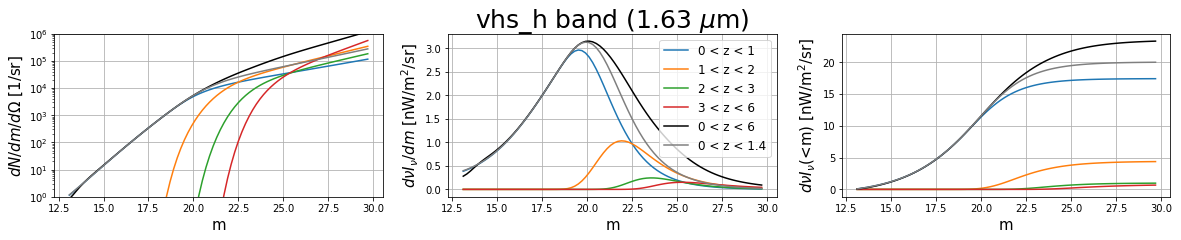

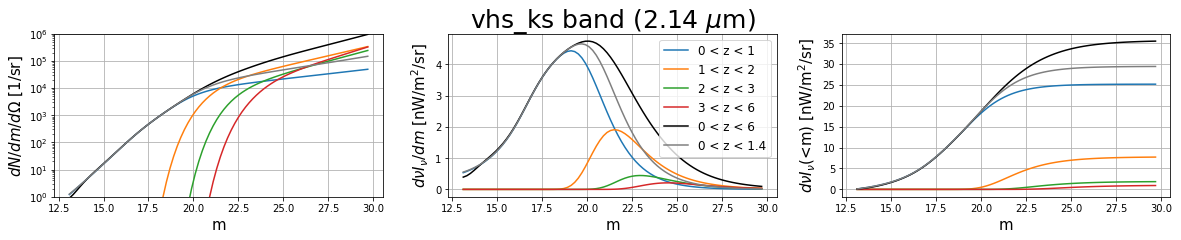

In [12]:
from Helgason import *
euclid_bands_dict = {'y':(0.920,1.146), 'j':(1.146,1.372),'h':(1.372,2.000)}

mbinedges = np.arange(13,30,0.2)
mbins = (mbinedges[1:] + mbinedges[:-1])/2

z_min_arr = [0,1,2,3,0,0]
z_max_arr = [1,2,3,6,6,1.4]
c_arr = ['C0','C1','C2','C3','k','C7']

bandwl_dict = {'sdss_u':0.360804, 'sdss_g':0.467178, 'sdss_r':0.614112, 
               'sdss_i':0.745789, 'sdss_z':0.892278,
               'vhs_j':1.248100, 'vhs_h':1.634819, 'vhs_ks':2.143546}

for i, band_name in enumerate(['vhs_j','vhs_h','vhs_ks']):
    bandwl = bandwl_dict[band_name]
    fig, ax = plt.subplots(1,3,figsize=(20,3))
    for z_min, z_max, c in zip(z_min_arr, z_max_arr, c_arr):
        bandnu = bandwl * u.um.to(u.Hz, equivalencies=u.spectral())
        
        dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,m_min=m_min,m_max=m_max,
                                                zmin=z_min, zmax=z_max) \
                        for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) \
                        / (u.sr).to(u.deg**2)

        nuFnu = bandnu*(3631*10**(-mbins/2.5)) * (u.Hz*u.Jy).to(u.nW/u.m**2)
        dnuInu_dmh = dN_dm_ddeg2h * nuFnu / ((u.deg**2).to(u.sr))
        nuInu_cumh = np.cumsum(dnuInu_dmh*np.diff(mbinedges))

        ax[0].semilogy(mbins, dN_dm_ddeg2h,c=c)

        ax[1].plot(mbins, dnuInu_dmh,c=c,
                   label='{} < z < {}'.format(z_min, z_max))
        ax[2].plot(mbins, nuInu_cumh,c=c)


    ax[0].set_ylim([1e0,1e6])
    ax[0].grid()
    ax[0].set_xlabel('m',fontsize=15)
    ax[0].set_ylabel(r'$dN/dm/d\Omega$ [1/sr]',fontsize=15)

    ax[1].grid()
    ax[1].legend(fontsize=12)
    ax[1].set_xlabel('m',fontsize=15)
    ax[1].set_ylabel(r'$d\nu I_\nu/dm$ [nW/m$^2$/sr]',fontsize=15)
    ax[1].set_title(r'{} band ({:.2f} $\mu$m)'.format(band_name, bandwl),fontsize=25)

    ax[2].grid()
    ax[2].set_xlabel('m',fontsize=15)
    ax[2].set_ylabel(r'$d\nu I_\nu$(<m) [nW/m$^2$/sr]',fontsize=15)

***

In [545]:
from micecat import *

ra_min, ra_max = 40, 50
dec_min, dec_max = 0, 2
df = get_micecat_df(return_full=True, ra_range=(ra_min, ra_max),
                    dec_range=(dec_min, dec_max))
dfc = df[df['flag_central']==0]
dfs = df[df['flag_central']==1]

Omega_cat = (ra_max - ra_min) * (dec_max - dec_min)

MICECAT 40 < ra < 50, 0 < dec < 2


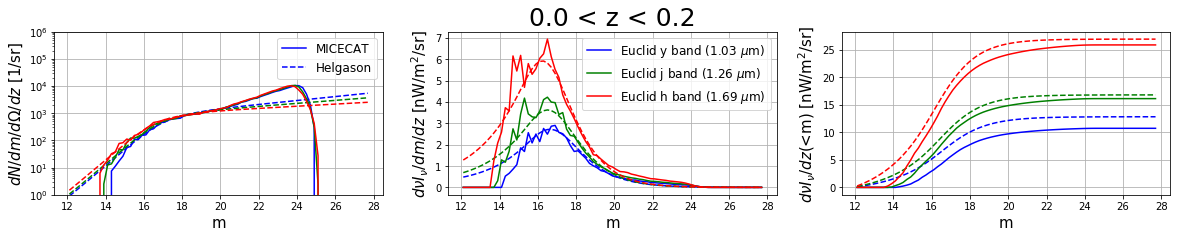

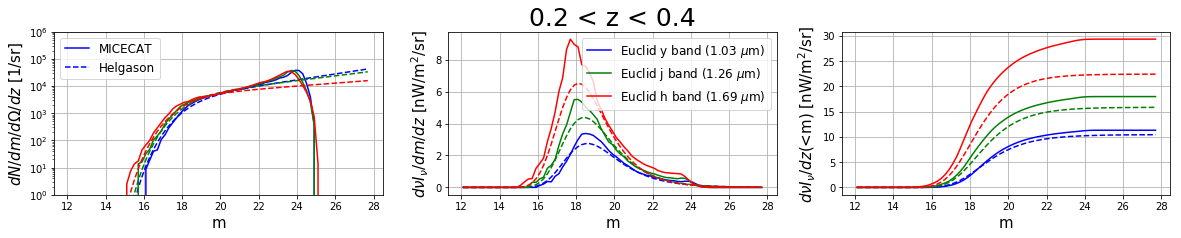

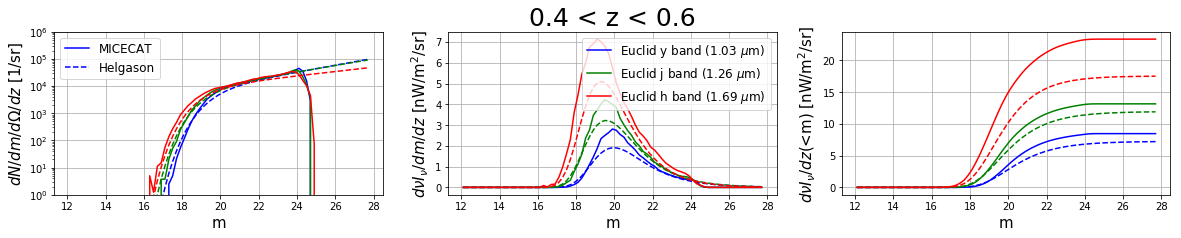

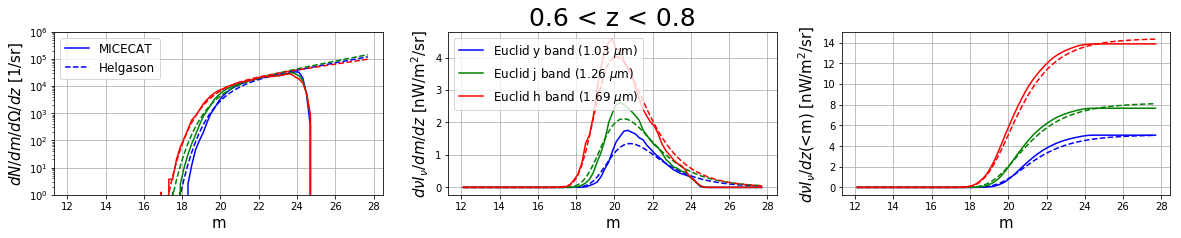

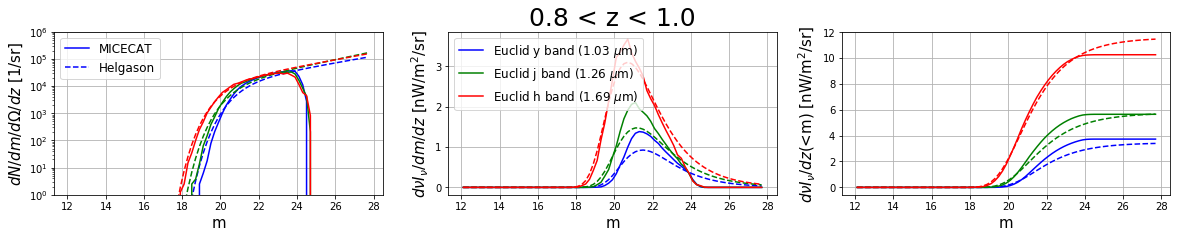

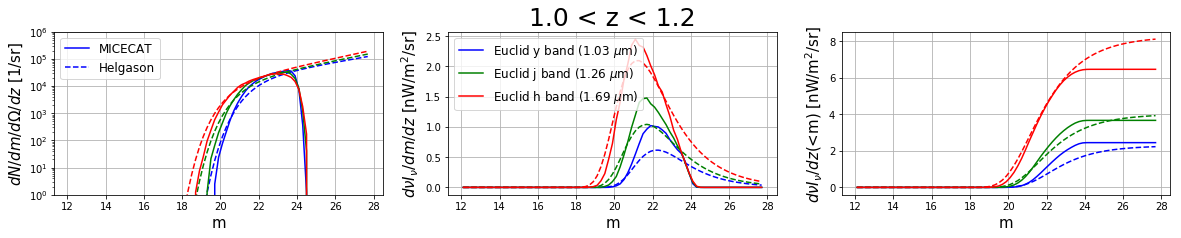

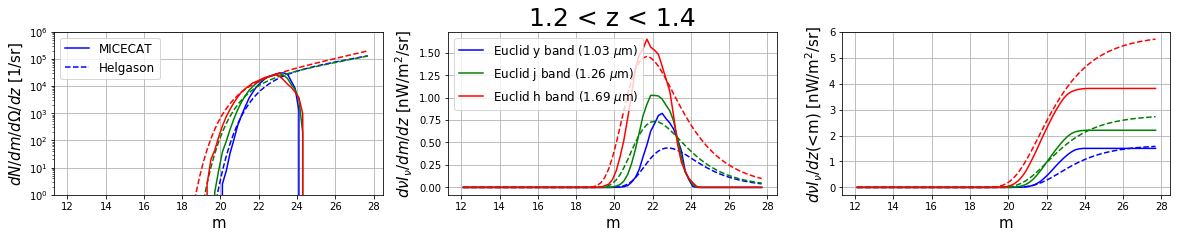

In [546]:
from Helgason import *
euclid_bands_dict = {'y':(0.920,1.146), 'j':(1.146,1.372),'h':(1.372,2.000)}

mbinedges = np.arange(12,28,0.2)
mbins = (mbinedges[1:] + mbinedges[:-1])/2

zbinedges = np.arange(0,1.5,0.2)
for z_min, z_max in zip(zbinedges[:-1],zbinedges[1:]):
    fig, ax = plt.subplots(1,3,figsize=(20,3))
    for iband, (euclid_band, c) in enumerate(zip(['y','j','h'], ['b','g','r'])):

        bandwl = np.mean(euclid_bands_dict[euclid_band])
        bandnu = bandwl * u.um.to(u.Hz, equivalencies=u.spectral())
        bandname = 'euclid_nisp_'+euclid_band+'_true'
        
        dfi = df[(df['z_cgal']>=z_min) & (df['z_cgal']<z_max)][bandname]
        dN_dm_ddeg2m = np.histogram(dfi, bins=mbinedges)[0]
        dN_dm_ddeg2m = dN_dm_ddeg2m / np.diff(mbinedges) / Omega_cat / (z_max - z_min)

        dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,m_min=m_min,m_max=m_max,
                                                zmin=z_min, zmax=z_max) \
                        for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
        dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) \
                        / (u.sr).to(u.deg**2) / (z_max - z_min)

        nuFnu = bandnu*(3631*10**(-mbins/2.5)) * (u.Hz*u.Jy).to(u.nW/u.m**2)
        dnuInu_dmm = dN_dm_ddeg2m * nuFnu / ((u.deg**2).to(u.sr))
        dnuInu_dmh = dN_dm_ddeg2h * nuFnu / ((u.deg**2).to(u.sr))

        nuInu_cumm = np.cumsum(dnuInu_dmm*np.diff(mbinedges))
        nuInu_cumh = np.cumsum(dnuInu_dmh*np.diff(mbinedges))

        ax[0].semilogy(mbins, dN_dm_ddeg2m,c=c,label='MICECAT')
        ax[0].plot(mbins, dN_dm_ddeg2h,'--',c=c,label='Helgason')
        if iband==0:
            ax[0].legend(fontsize=12)

        ax[1].plot(mbins, dnuInu_dmm,c=c,
                   label=r'Euclid {} band ({:.2f} $\mu$m)'.format(euclid_band, bandwl))
        ax[1].plot(mbins, dnuInu_dmh,'--',c=c)

        ax[2].plot(mbins, nuInu_cumm,c=c,label='MICECAT')
        ax[2].plot(mbins, nuInu_cumh,'--',c=c,label='Helgason')


    ax[0].set_ylim([1e0,1e6])
    ax[0].grid()
    ax[0].set_xlabel('m',fontsize=15)
    ax[0].set_ylabel(r'$dN/dm/d\Omega/dz$ [1/sr]',fontsize=15)

    ax[1].grid()
    ax[1].legend(fontsize=12)
    ax[1].set_xlabel('m',fontsize=15)
    ax[1].set_ylabel(r'$d\nu I_\nu/dm/dz$ [nW/m$^2$/sr]',fontsize=15)
    ax[1].set_title('{:.1f} < z < {:.1f}'.format(z_min, z_max),fontsize=25)

    ax[2].grid()
    ax[2].set_xlabel('m',fontsize=15)
    ax[2].set_ylabel(r'$d\nu I_\nu/dz$(<m) [nW/m$^2$/sr]',fontsize=15)

***
# Power Spectrum

$C_{\ell,\nu\nu'} = \int d{\rm ln}k\, \frac{2}{\pi}k^3P_0(k) \left [\int dz\frac{d(\nu I_\nu(\nu))}{dz}b(z)G(z)j_\ell(k\chi(z))  \right ]\left [\int dz\frac{d(\nu' I_\nu(\nu'))}{dz}b(z)G(z)j_\ell(k\chi(z))  \right ]$
$= \int d{\rm ln}k\, \frac{2}{\pi}k^3P_0(k) \left [\int \frac{d\chi}{\chi}\chi\frac{dz}{d\chi}\frac{d(\nu I_\nu(\nu))}{dz}b(\chi)G(\chi)j_\ell(k\chi)  \right ]\left [\int \frac{d\chi}{\chi}\chi\frac{dz}{d\chi}\frac{d(\nu' I_\nu(\nu'))}{dz}b(\chi)G(\chi)j_\ell(k\chi)  \right ]$

Using Limber approximation:
$C_{\ell,\nu} =\int dz\frac{H(z)}{c}\frac{1}{\chi(z)^2} \left ( \frac{d(\nu I_\nu(\nu))}{dz} \right )^2b^2(z)G(z)P_0(k=\frac{\ell+1/2}{\chi(z)}) $

Text(0.5, 0, 'z')

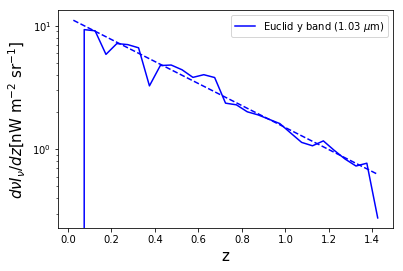

In [4]:
from micecat import *

ra_min, ra_max = 35, 55
dec_min, dec_max = 0, 2
df = get_micecat_df(return_full=True, ra_range=(ra_min, ra_max),
                    dec_range=(dec_min, dec_max))
Omega_cat = (ra_max - ra_min) - (dec_max - dec_min)

euclid_bands_dict = {'y':(0.920,1.146), 'j':(1.146,1.372),'h':(1.372,2.000)}
z_binedges = np.arange(0,1.5,0.05)
z_bins = (z_binedges[:-1] + z_binedges[1:]) / 2
dnuInu_dz_arr = np.zeros_like(z_bins)
for iband, (euclid_band, c) in enumerate(zip(['y','j','h'], ['b','g','r'])):
    if iband != 0:
        continue
    for iz, (z_min, z_max) in enumerate(zip(z_binedges[:-1],z_binedges[1:])):
        bandwl = np.mean(euclid_bands_dict[euclid_band])
        bandnu = bandwl * u.um.to(u.Hz, equivalencies=u.spectral())
        bandname = 'euclid_nisp_'+euclid_band+'_true'
        dfi = df[(df['z_cgal'] >= z_min) & (df['z_cgal'] < z_max)][bandname]
        nuFnu = bandnu*(3631*10**(-dfi/2.5)) * (u.Hz*u.Jy).to(u.nW/u.m**2)
        dnuInu_dz_arr[iz] = np.sum(nuFnu) / (Omega_cat * (u.deg**2).to(u.sr)) / (z_max - z_min)
    plt.semilogy(z_bins, dnuInu_dz_arr, c=c,
                 label=r'Euclid {} band ({:.2f} $\mu$m)'.format(euclid_band, bandwl))
    
    sp_fit = np.where((z_bins>0.2) & (z_bins<1.3))[0]
    fit_poly = np.polyfit(z_bins[sp_fit], np.log10(dnuInu_dz_arr[sp_fit]), 1)
    dnuInu_dz_fit = lambda z: 10**np.polyval(fit_poly, z)
    
    plt.semilogy(z_bins, dnuInu_dz_fit(z_bins), c=c, ls='--')
    
plt.legend()
plt.ylabel(r'$d\nu I_\nu/dz$[nW m$^{-2}$ sr$^{-1}$]', fontsize=15)
plt.xlabel('z',fontsize=15)

In [24]:
from micecat import *
from srcmap import *
from power_spec import *
from cosmo_tools import *
from fftlog import *

z_range = (0.1, 1.3)
euclid_bands_dict = {'y':(0.920,1.146), 'j':(1.146,1.372),'h':(1.372,2.000)}

icat = 15
df = get_micecat_df(icat, return_full=True)
df = df[(df['z_cgal'] >= z_range[0]) & (df['z_cgal'] < z_range[1])]
Omega_cat = 2 * 2

make_srcmap_class = make_srcmap()

MICECAT field 15, 30 < ra < 32, 0 < dec < 2


In [71]:
euclid_band = 'y'
bandwl = np.mean(euclid_bands_dict[euclid_band])
bandname = 'euclid_nisp_'+euclid_band+'_true'

xs, ys, ms = np.array(df['x']), np.array(df['y']), np.array(df[bandname])
ms_inband = np.array(df[bandname])

make_srcmap_class.wl = bandwl
make_srcmap_class.ms = ms_inband
make_srcmap_class.ms_inband = ms_inband
make_srcmap_class.xls = xs
make_srcmap_class.yls = ys

srcmap = make_srcmap_class.run_srcmap_nopsf()
ell_bins,Cl_arr,Cl_err = get_power_spec(srcmap)

In [161]:
# Limber

Nz = 500
z_min, z_max = z_range
z_binedges = np.linspace(z_min, z_max, Nz)
z_bins = (z_binedges[:-1] + z_binedges[1:]) / 2
dz_bins = np.diff(z_binedges)
chi_arr = cosmo_dist(z_bins).comoving_distance.value
G_arr = np.array([cosmo.hmf.growth.growth_factor(z) for z in z_bins])
dz_dchi_arr = (cosmo_dist(z_bins).H/const.c).to(u.h/u.Mpc).value
dnuInu_dz_arr = dnuInu_dz_fit(z_bins)

z_factor = dz_bins * dz_dchi_arr * (1/chi_arr)**2 * dnuInu_dz_arr**2 * G_arr
Cl_arr_limber = np.zeros_like(ell_bins)
for iell, ell in enumerate(ell_bins):
    k_arr = (ell + 0.5) / chi_arr
    P_arr = get_Plin_fast(0,k_arr)[0]
    Cl_arr_limber[iell] = np.sum(z_factor * P_arr)

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, '$[ \\ell(\\ell+1)C_\\ell/2\\pi ]^{1/2}( nW\\,m^{-2} sr^{-1})$')

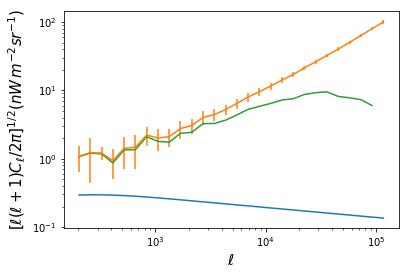

In [162]:
plt.loglog(ell_bins,np.sqrt(ell_bins*(ell_bins+1)*Cl_arr_limber/2/np.pi), label='analytic')
plt.errorbar(ell_bins,np.sqrt(ell_bins*(ell_bins+1)*Cl_arr/2/np.pi),
             np.sqrt(ell_bins*(ell_bins+1)*Cl_err/2/np.pi), label='map')

plt.plot(ell_bins,np.sqrt(ell_bins*(ell_bins+1)*(Cl_arr-np.mean(Cl_arr[-3:]))/2/np.pi), label='map')

plt.xlabel(r'$\ell$', fontsize=15)
plt.ylabel(r'$[ \ell(\ell+1)C_\ell/2\pi ]^{1/2}( nW\,m^{-2} sr^{-1})$', fontsize=15)

***

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


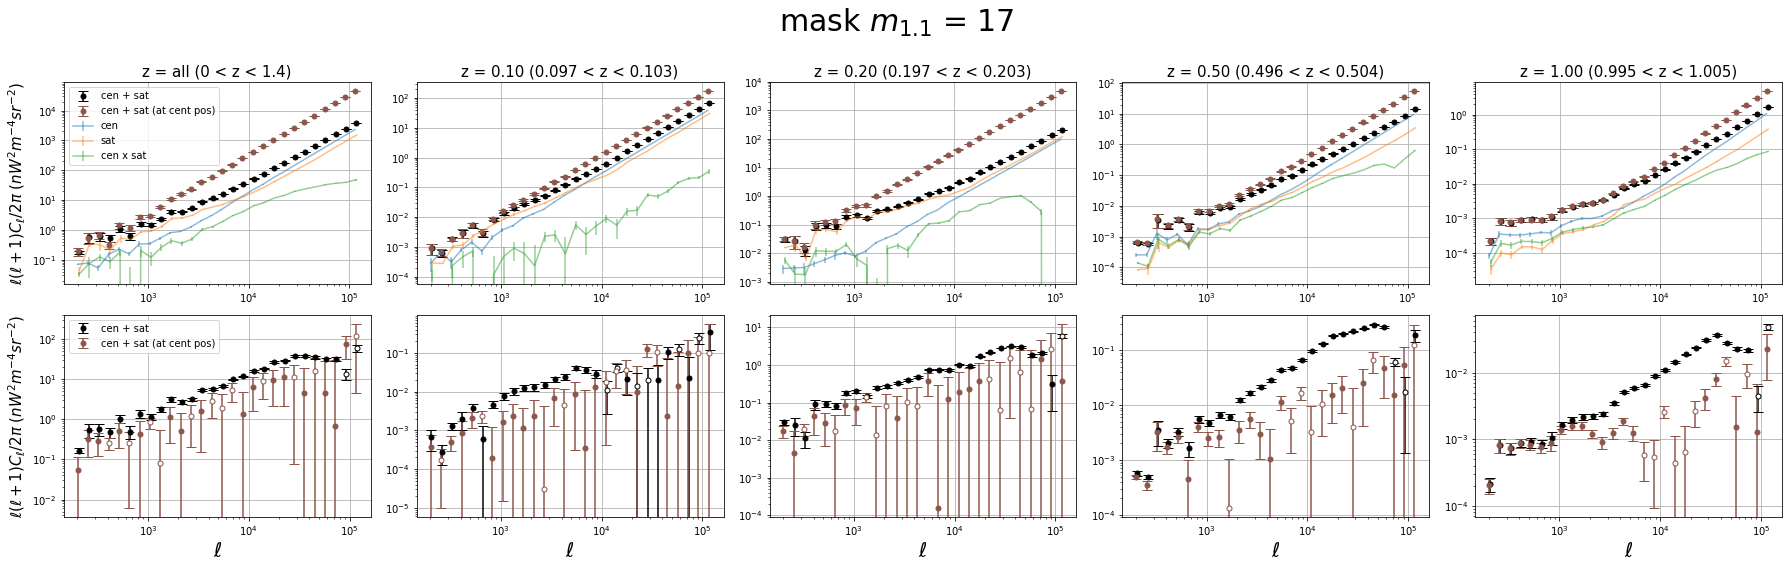

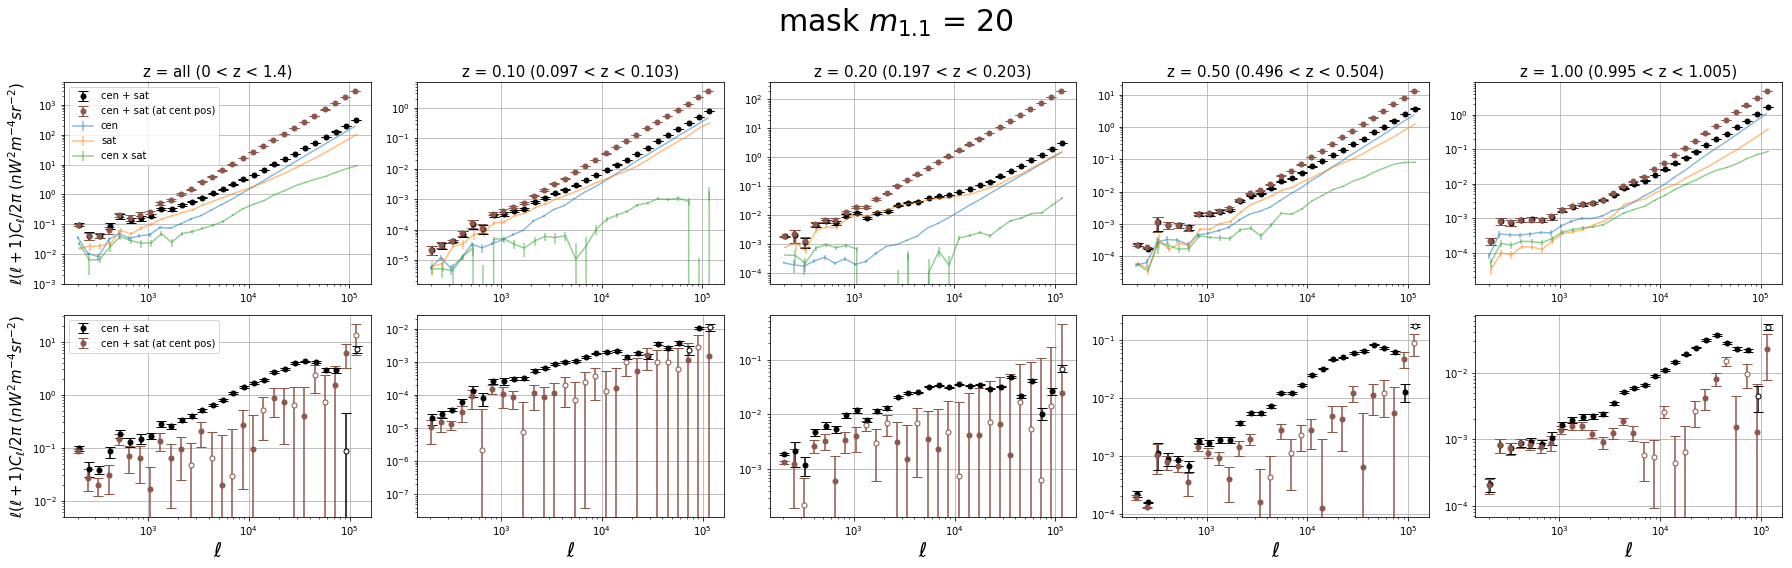

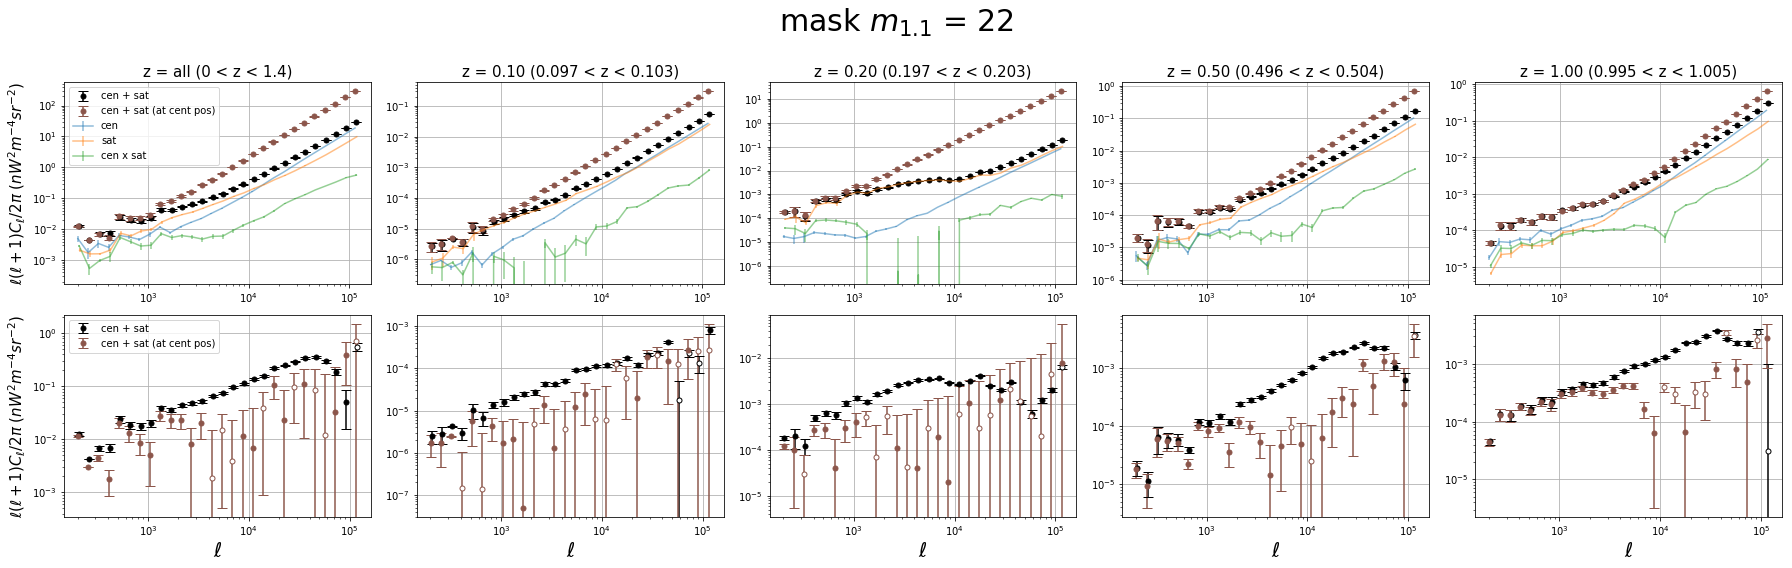

In [4]:
from micecat import *
from srcmap import *
from utils_plotting import *

df = get_micecat_df(ra_range=(40,50), dec_range=(0,2))
inst = 1
make_srcmap_class = make_srcmap(inst)

for m_th in [17, 20, 22]:

    Fnu_I = 3631 * 10**(-df['I'].values / 2.5)
    Fnu_H = 3631 * 10**(-df['H'].values / 2.5)
    Fnu_I[df.I < m_th] = 0
    Fnu_H[df.I < m_th] = 0
    df['Fnu_I'], df['Fnu_H'] = Fnu_I, Fnu_H
    dfc = df[df.flag_central==0].copy()
    dfsum = df.groupby('unique_halo_id',as_index=False)[['Fnu_I','Fnu_H']].sum()
    dfsum.rename(columns={'Fnu_I':'Fnu_I_sum','Fnu_H':'Fnu_H_sum'}, inplace=True)
    dfc = dfc.merge(dfsum, on='unique_halo_id')
    dfc['I_sum'] = -2.5 * np.log10(dfc['Fnu_I_sum']/3631)
    dfc['H_sum'] = -2.5 * np.log10(dfc['Fnu_H_sum']/3631)

    fig, ax = plt.subplots(2,5, figsize=(25,8))
    for i,z_mid in enumerate([None, 0.1, 0.2, 0.5, 1]):
        if z_mid == None:
            z_min, z_max = 0, 1.4
        else:
            delz = 0.005
            Dz = (1 + z_mid) * delz
            z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

        dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) & (df.I > m_th)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I']) if inst==1 else np.array(dfi['H'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_all = make_srcmap_class.run_srcmap_nopsf()

        dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) & (df.flag_central ==0) & (df.I > m_th)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I']) if inst==1 else np.array(dfi['H'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_cen = make_srcmap_class.run_srcmap_nopsf()
        srcmap_sat = srcmap_all - srcmap_cen

        dfi = dfc[(dfc.z_cgal >= z_min) & (dfc.z_cgal < z_max)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I_sum']) if inst==1 else np.array(dfi['H_sum'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_allcen = make_srcmap_class.run_srcmap_nopsf()

        l,Cla, Claerr = get_power_spec(srcmap_all)
        l,Clc, Clcerr = get_power_spec(srcmap_cen)
        l,Cls, Clserr = get_power_spec(srcmap_sat)
        l,Clx, Clxerr = get_power_spec(srcmap_cen, srcmap_sat)
        l,Clac, Clacerr = get_power_spec(srcmap_allcen)

        Dla = Cla*l*(l+1)/2/np.pi
        Dlc = Clc*l*(l+1)/2/np.pi
        Dls = Cls*l*(l+1)/2/np.pi
        Dlx = Clx*l*(l+1)/2/np.pi
        Dlac = Clac*l*(l+1)/2/np.pi

        Dla_shsub = (Cla-np.mean(Cla[-3:]))*l*(l+1)/2/np.pi
        Dlc_shsub = (Clc-np.mean(Clc[-3:]))*l*(l+1)/2/np.pi
        Dls_shsub = (Cls-np.mean(Cls[-3:]))*l*(l+1)/2/np.pi
        Dlac_shsub = (Clac-np.mean(Clac[-3:]))*l*(l+1)/2/np.pi

        Dlaerr = Claerr*l*(l+1)/2/np.pi
        Dlcerr = Clcerr*l*(l+1)/2/np.pi
        Dlserr = Clserr*l*(l+1)/2/np.pi
        Dlxerr = Clxerr*l*(l+1)/2/np.pi
        Dlacerr = Clacerr*l*(l+1)/2/np.pi


        plot_err_log(l*1.01, Dla, Dlaerr, ax=ax[0][i], xlog=True, plot_xerr=False, 
                         color='k', capsize=5, markersize=10, 
                    label='cen + sat'%(np.mean(srcmap_sat)))
        plot_err_log(l*0.99, Dlac, Dlacerr, ax=ax[0][i], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos)'%(np.mean(srcmap_sat)))
        ax[0][i].errorbar(l*0.98, Dlc, Dlcerr, c='C0', alpha=0.5,
                          label='cen')
        ax[0][i].errorbar(l*1.02, Dls, Dlserr, c='C1', alpha=0.5,
                          label='sat')
        ax[0][i].errorbar(l*1.01, Dlx, Dlxerr, c='C2', alpha=0.5,
                          label='cen x sat')
        ax[0][i].set_xscale('log')
        ax[0][i].set_yscale('log')
        ax[0][i].grid()

        if i==0:
            ax[0][i].set_title('z = all (0 < z < 1.4)', fontsize=15)
        else:
            ax[0][i].set_title('z = {:.2f} ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=15)

        plot_err_log(l*1.01, Dla_shsub, Dlaerr, ax=ax[1][i], xlog=True, plot_xerr=False, 
                         color='k', capsize=5, markersize=10, 
                    label='cen + sat'%(np.mean(srcmap_sat)))
        plot_err_log(l*0.99, Dlac_shsub, Dlacerr, ax=ax[1][i], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos)'%(np.mean(srcmap_sat)))
        ax[1][i].set_xscale('log')
        ax[1][i].set_yscale('log')
        ax[1][i].set_xlabel(r'$\ell$', fontsize=20)
        ax[1][i].grid()

    ax[0][0].legend()
    ax[1][0].legend()
    ax[0][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ $(nW^{2}m^{-4} sr^{-2})$', fontsize=15)
    ax[1][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ $(nW^{2}m^{-4} sr^{-2})$',fontsize=15)

    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    fig.suptitle(r'mask $m_{1.1}$ = %d'%m_th, fontsize=30)

In [53]:
from micecat import *
df0 = get_micecat_df(ra_range=(40,50), dec_range=(0,2), add_Rvir=True)
df1 = get_micecat_df(ra_range=(30,40), dec_range=(0,2), add_Rvir=True)
df2 = get_micecat_df(ra_range=(50,60), dec_range=(0,2), add_Rvir=True)

MICECAT 40 < ra < 50, 0 < dec < 2
MICECAT 30 < ra < 40, 0 < dec < 2
MICECAT 50 < ra < 60, 0 < dec < 2


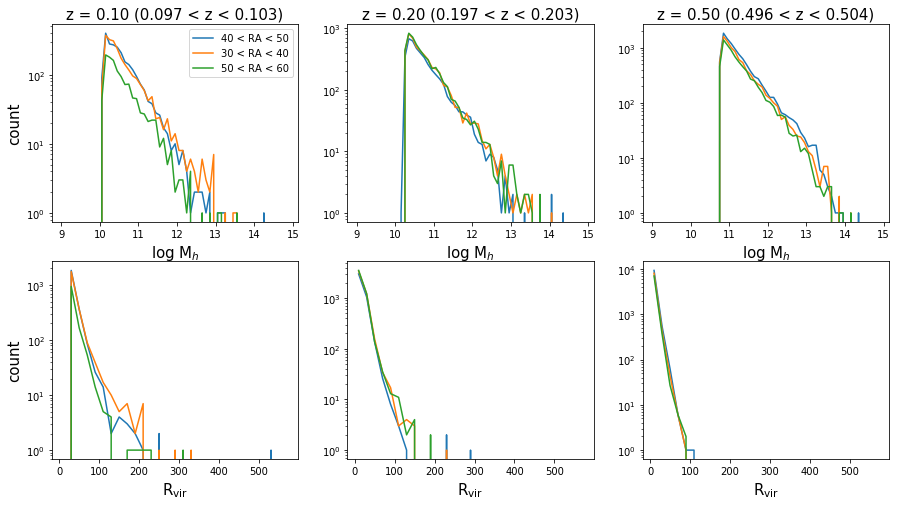

In [90]:
lmhalo_binedges = np.arange(9,15,0.1)
Rvir_binedges = np.arange(0,600,20)
lmhalo_bins = (lmhalo_binedges[1:] + lmhalo_binedges[:-1]) / 2
Rvir_bins = (Rvir_binedges[1:] + Rvir_binedges[:-1]) / 2

fig, ax = plt.subplots(2,3, figsize=(15,8))
for iz, z_mid in enumerate([0.1,0.2,0.5]):
    delz = 0.005
    Dz = (1 + z_mid) * delz
    z_min, z_max = z_mid - Dz/2, z_mid + Dz/2
    
    for df,ra_min,ra_max in zip([df0, df1, df2],[40,30,50],[50,40,60]):
        lmhalo = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) & (df.flag_central==0)].lmhalo.values
        Rvir = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) & (df.flag_central==0)].Rv_arcsec.values
        h_M = np.histogram(lmhalo, lmhalo_binedges)[0]
        h_R = np.histogram(Rvir, Rvir_binedges)[0]

        ax[0][iz].semilogy(lmhalo_bins, h_M, label=r'%d < RA < %d'%(ra_min, ra_max))
        ax[1][iz].semilogy(Rvir_bins, h_R)
        
        ax[0][iz].set_title('z = {:.2f} ({:.3f} < z < {:.3f})'\
                            .format(z_mid, z_min, z_max), fontsize=15)
        ax[0][iz].set_xlabel(r'log M$_h$', fontsize=15)
        ax[1][iz].set_xlabel(r'R$_{\rm vir}$', fontsize=15)
        
ax[0][0].set_ylabel('count', fontsize=15)
ax[1][0].set_ylabel('count', fontsize=15)
ax[0][0].legend()

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.0007025517476976233 0.159342923182824
0.013701542996032927 0.7506251939993988
-7.813878938420921e-20 4.1076738983272575e-17
0.0004055318628207585 0.11173732832372649
-1.1858461261560205e-20 1.443251393010261e-17
-5.0186702124817295e-20 2.7820675434833656e-17
0.0024595058594443883 0.287156312188822
2.752857078576476e-21 1.3529522265469115e-17
7.623296525288703e-21 2.944082975066552e-17


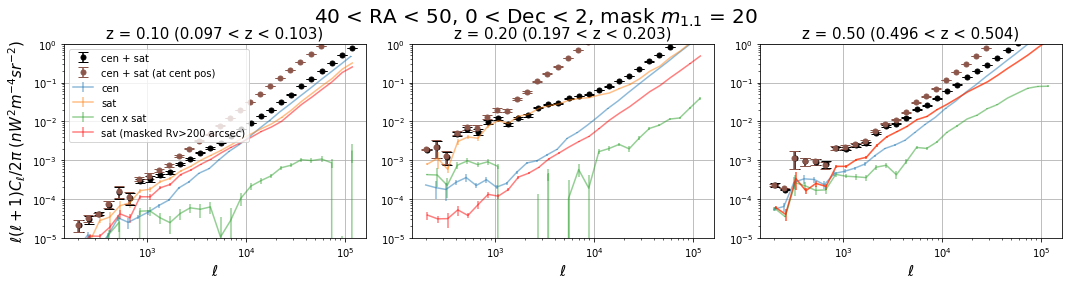

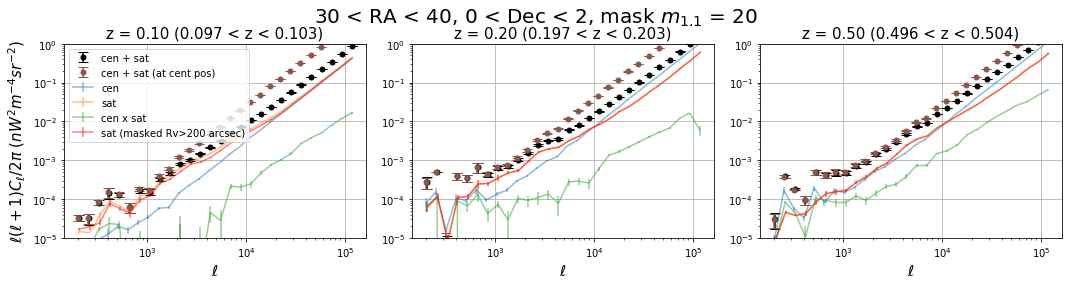

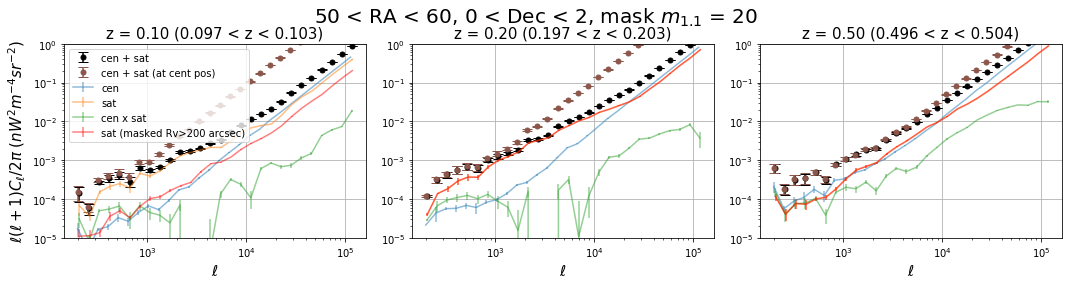

In [88]:
from micecat import *
from srcmap import *
from utils_plotting import *

inst = 1
# make_srcmap_class = make_srcmap(inst)

m_th = 20
for df,ra_min,ra_max in zip([df0, df1, df2],[40,30,50],[50,40,60]):
    Fnu_I = 3631 * 10**(-df['I'].values / 2.5)
    Fnu_H = 3631 * 10**(-df['H'].values / 2.5)
    Fnu_I[df.I < m_th] = 0
    Fnu_H[df.I < m_th] = 0
    df['Fnu_I'], df['Fnu_H'] = Fnu_I, Fnu_H
    dfc = df[df.flag_central==0].copy()
    dfsum = df.groupby('unique_halo_id',as_index=False)[['Fnu_I','Fnu_H']].sum()
    dfsum.rename(columns={'Fnu_I':'Fnu_I_sum','Fnu_H':'Fnu_H_sum'}, inplace=True)
    dfc = dfc.merge(dfsum, on='unique_halo_id')
    dfc['I_sum'] = -2.5 * np.log10(dfc['Fnu_I_sum']/3631)
    dfc['H_sum'] = -2.5 * np.log10(dfc['Fnu_H_sum']/3631)

    fig, ax = plt.subplots(1,3, figsize=(15,4))
    for i,z_mid in enumerate([0.1, 0.2, 0.5]):
        if z_mid == None:
            z_min, z_max = 0, 1.4
        else:
            delz = 0.005
            Dz = (1 + z_mid) * delz
            z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

        dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) & (df.I > m_th)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I']) if inst==1 else np.array(dfi['H'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_all = make_srcmap_class.run_srcmap_nopsf()

        dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
                 & (df.flag_central ==0) & (df.I > m_th)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I']) if inst==1 else np.array(dfi['H'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_cen = make_srcmap_class.run_srcmap_nopsf()
        srcmap_sat = srcmap_all - srcmap_cen

        dfi = dfc[(dfc.z_cgal >= z_min) & (dfc.z_cgal < z_max)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I_sum']) if inst==1 else np.array(dfi['H_sum'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_allcen = make_srcmap_class.run_srcmap_nopsf()

        dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
                 & (df.flag_central ==1) & (df.I > m_th) & (df.Rv_arcsec<200)]
        make_srcmap_class.ms = dfi['I']
        make_srcmap_class.ms_inband = np.array(dfi['I']) if inst==1 else np.array(dfi['H'])
        make_srcmap_class.xls = dfi['x']
        make_srcmap_class.yls = dfi['y']
        srcmap_sat1 = make_srcmap_class.run_srcmap_nopsf()
        
        l,Cla, Claerr = get_power_spec(srcmap_all)
        l,Clc, Clcerr = get_power_spec(srcmap_cen)
        l,Cls, Clserr = get_power_spec(srcmap_sat)
        l,Clx, Clxerr = get_power_spec(srcmap_cen, srcmap_sat)
        l,Clac, Clacerr = get_power_spec(srcmap_allcen)
        l,Cls1, Clserr1 = get_power_spec(srcmap_sat1)
        
        Dla = Cla*l*(l+1)/2/np.pi
        Dlc = Clc*l*(l+1)/2/np.pi
        Dls = Cls*l*(l+1)/2/np.pi
        Dlx = Clx*l*(l+1)/2/np.pi
        Dlac = Clac*l*(l+1)/2/np.pi
        Dls1 = Cls1*l*(l+1)/2/np.pi
        
        Dla_shsub = (Cla-np.mean(Cla[-3:]))*l*(l+1)/2/np.pi
        Dlc_shsub = (Clc-np.mean(Clc[-3:]))*l*(l+1)/2/np.pi
        Dls_shsub = (Cls-np.mean(Cls[-3:]))*l*(l+1)/2/np.pi
        Dlac_shsub = (Clac-np.mean(Clac[-3:]))*l*(l+1)/2/np.pi
        Dls1_shsub = (Cls-np.mean(Cls1[-3:]))*l*(l+1)/2/np.pi
        
        Dlaerr = Claerr*l*(l+1)/2/np.pi
        Dlcerr = Clcerr*l*(l+1)/2/np.pi
        Dlserr = Clserr*l*(l+1)/2/np.pi
        Dlxerr = Clxerr*l*(l+1)/2/np.pi
        Dlacerr = Clacerr*l*(l+1)/2/np.pi
        Dlserr1 = Clserr1*l*(l+1)/2/np.pi
        
        plot_err_log(l*1.01, Dla, Dlaerr, ax=ax[i], xlog=True, plot_xerr=False, 
                         color='k', capsize=5, markersize=10, 
                    label='cen + sat'%(np.mean(srcmap_sat)))
        plot_err_log(l*0.99, Dlac, Dlacerr, ax=ax[i], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos)'%(np.mean(srcmap_sat)))
        ax[i].errorbar(l*0.98, Dlc, Dlcerr, c='C0', alpha=0.5,
                          label='cen')
        ax[i].errorbar(l*1.02, Dls, Dlserr, c='C1', alpha=0.5,
                          label='sat')
        ax[i].errorbar(l*1.01, Dlx, Dlxerr, c='C2', alpha=0.5,
                          label='cen x sat')
        ax[i].errorbar(l*1.02, Dls1, Dlserr1, c='r', alpha=0.5,
                          label='sat (masked Rv>200 arcsec)')
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        ax[i].grid()

        ax[i].set_title('z = {:.2f} ({:.3f} < z < {:.3f})'.format(z_mid, z_min, z_max), fontsize=15)
        ax[i].set_xlabel(r'$\ell$', fontsize=15)
        ax[i].set_ylim([1e-5, 1e0])
    ax[0].legend()
    ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ $(nW^{2}m^{-4} sr^{-2})$', fontsize=15)

    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    fig.suptitle(r'%d < RA < %d, %d < Dec < %d, mask $m_{1.1}$ = %d'\
                 %(ra_min, ra_max, 0, 2, m_th), fontsize=20)

In [1]:
# from micecat_field import *

# ra_arr = np.arange(32,59,2)[::2]
# dec_arr = np.arange(2,29,3)[::2]
# bandname = 'ciber_I'
# m_th = 20

# Cl_data = {'bandname': bandname, 'm_th':20, 'ra_arr':ra_arr, 'dec_arr':dec_arr}

# dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
# for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
    
#     print('field {}, ra = {}, dec = {}'.format(ifield, ra_cent, dec_cent))
        
#     Cl_data[ifield] = {'ra_cent': ra_cent, 'dec_cent': dec_cent}
    
#     mcfield = micecat_field(ra_cent, dec_cent,Nx=1024,Ny=1024)
#     df = mcfield.get_micecat_df()

#     for iz, z_mid in enumerate([None, 0.1, 0.2, 0.5, 1]):
#         if z_mid == None:
#             z_min, z_max = 0, 1.4
#         else:
#             delz = 0.005
#             Dz = (1 + z_mid) * delz
#             z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

#         Cl_data[ifield][iz] = {'z': z_mid, 'z_min': z_min, 'z_max':z_max}
        
#         for iR, R_vir in enumerate([200, 300, np.inf]):
            
#             Cl_data[ifield][iz][iR] = {'R_vir': R_vir}
            
#             dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
#                      & (df[bandname+'_true'] > m_th) & (df.Rv_arcsec < R_vir)]
            
#             srcmap_all = mcfield.make_map(bandname, df=dfi)
#             srcmap_allcen = mcfield.make_map_central(bandname, df=dfi)
        
#             dfi = dfi[dfi.flag_central ==0]
#             srcmap_cen = mcfield.make_map(bandname, df=dfi)
#             srcmap_sat = srcmap_all - srcmap_cen

#             l,Cla, Claerr = get_power_spec(srcmap_all)
#             l,Clc, Clcerr = get_power_spec(srcmap_cen)
#             l,Cls, Clserr = get_power_spec(srcmap_sat)
#             l,Clx, Clxerr = get_power_spec(srcmap_cen, srcmap_sat)
#             l,Clac, Clacerr = get_power_spec(srcmap_allcen)
#             Cla_shsub = Cla-np.mean(Cla[-3:])
#             Clc_shsub = Clc-np.mean(Clc[-3:])
#             Cls_shsub = Cls-np.mean(Cls[-3:])
#             Clac_shsub = Clac-np.mean(Clac[-3:])
            
#             Cl_data[ifield]['l'] = l
#             Cl_data[ifield][iz][iR]['Cla'] = Cla
#             Cl_data[ifield][iz][iR]['Clc'] = Clc
#             Cl_data[ifield][iz][iR]['Cls'] = Cls
#             Cl_data[ifield][iz][iR]['Clx'] = Clx
#             Cl_data[ifield][iz][iR]['Clac'] = Clac
#             Cl_data[ifield][iz][iR]['Cla_shsub'] = Cla_shsub
#             Cl_data[ifield][iz][iR]['Clc_shsub'] = Clc_shsub
#             Cl_data[ifield][iz][iR]['Cls_shsub'] = Cls_shsub
#             Cl_data[ifield][iz][iR]['Clac_shsub'] = Clac_shsub  
# clear_output()

Text(0.5, 0.98, 'mask $m_{1.1}$ = 20, $R_{\\rm vir}$ < 200 (top), 300 (middle), Inf (bottom)')

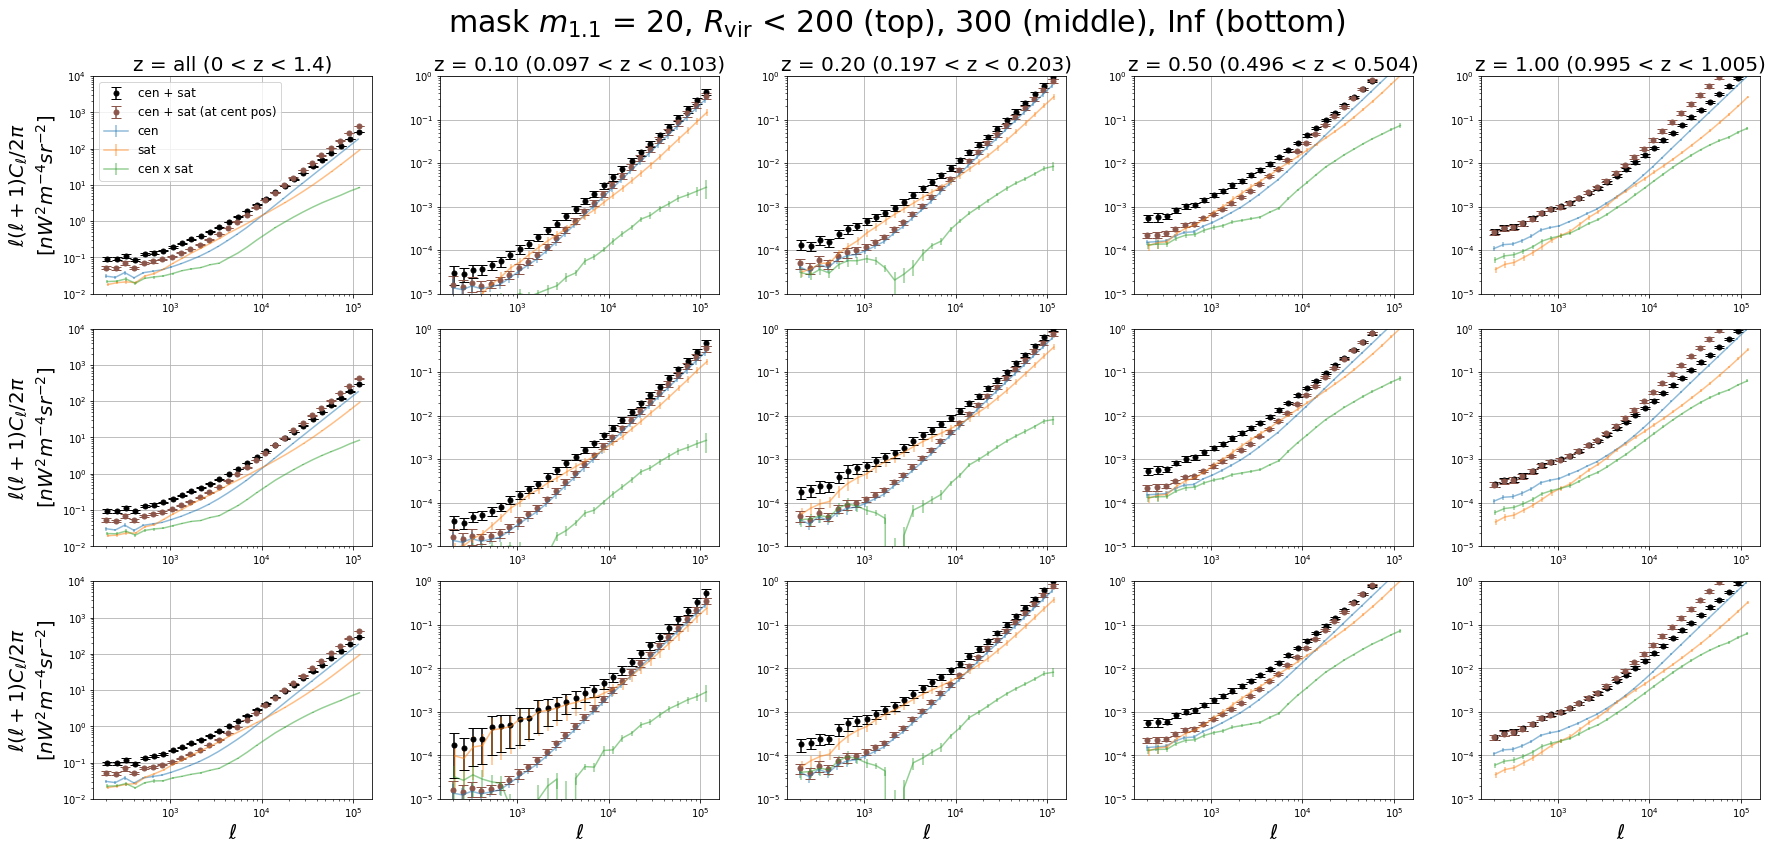

In [4]:
ra_arr = Cl_data['ra_arr']
dec_arr = Cl_data['dec_arr']
Nfields = len(ra_arr)*len(dec_arr)
l = Cl_data[0]['l']

fig, ax = plt.subplots(3,5, figsize=(25,12))

for iz, z_mid in enumerate([None, 0.1, 0.2, 0.5, 1]):
    z_min, z_max = Cl_data[0][iz]['z_min'], Cl_data[0][iz]['z_max']
    for iR, R_vir in enumerate([200, 300, np.inf]):
        Dla, Dlc, Dls, Dlx, Dlac = [], [], [], [], []
        Dla_shsub, Dlc_shsub, Dls_shsub, Dlac_shsub = [], [], [], []

        for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
            Dla.append(Cl_data[ifield][iz][iR]['Cla']*l*(l+1)/2/np.pi)
            Dlc.append(Cl_data[ifield][iz][iR]['Clc']*l*(l+1)/2/np.pi)
            Dls.append(Cl_data[ifield][iz][iR]['Cls']*l*(l+1)/2/np.pi)
            Dlx.append(Cl_data[ifield][iz][iR]['Clx']*l*(l+1)/2/np.pi)
            Dlac.append(Cl_data[ifield][iz][iR]['Clac']*l*(l+1)/2/np.pi)
            Dla_shsub.append(Cl_data[ifield][iz][iR]['Cla_shsub']*l*(l+1)/2/np.pi)
            Dlc_shsub.append(Cl_data[ifield][iz][iR]['Clc_shsub']*l*(l+1)/2/np.pi)
            Dls_shsub.append(Cl_data[ifield][iz][iR]['Cls_shsub']*l*(l+1)/2/np.pi)
            Dlac_shsub.append(Cl_data[ifield][iz][iR]['Clac_shsub']*l*(l+1)/2/np.pi)
            
        Dla, Dlaerr = np.mean(Dla, axis=0), np.std(Dla, axis=0)/np.sqrt(Nfields)
        Dlc, Dlcerr = np.mean(Dlc, axis=0), np.std(Dlc, axis=0)/np.sqrt(Nfields)
        Dls, Dlserr = np.mean(Dls, axis=0), np.std(Dls, axis=0)/np.sqrt(Nfields)
        Dlx, Dlxerr = np.mean(Dlx, axis=0), np.std(Dlx, axis=0)/np.sqrt(Nfields)
        Dlac, Dlacerr = np.mean(Dlac, axis=0), np.std(Dlac, axis=0)/np.sqrt(Nfields)
        
        plot_err_log(l*1.01, Dla, Dlaerr, ax=ax[iR][iz], xlog=True, plot_xerr=False, 
                         color='k', capsize=5, markersize=10, 
                    label='cen + sat'%(np.mean(srcmap_sat)))
        plot_err_log(l*0.99, Dlac, Dlacerr, ax=ax[iR][iz], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos)'%(np.mean(srcmap_sat)))
        ax[iR][iz].errorbar(l*0.98, Dlc, Dlcerr, c='C0', alpha=0.5,
                          label='cen')
        ax[iR][iz].errorbar(l*1.02, Dls, Dlserr, c='C1', alpha=0.5,
                          label='sat')
        ax[iR][iz].errorbar(l*1.01, Dlx, Dlxerr, c='C2', alpha=0.5,
                          label='cen x sat')
        ax[iR][iz].set_ylim([1e-5, 1e0])
        if z_mid is None:
            ax[iR][iz].set_ylim([1e-2, 1e3])
        ax[iR][iz].set_xscale('log')
        ax[iR][iz].set_yscale('log')
        ax[iR][iz].grid()
        ax[iR][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                             fontsize=20)
        ax[-1][iz].set_xlabel(r'$\ell$', fontsize=20)
        if z_mid is None:
            ax[0][iz].set_title('z = all (0 < z < 1.4)', fontsize=20)
        else:
            ax[0][iz].set_title('z = {:.2f} ({:.3f} < z < {:.3f})'\
                                 .format(z_mid, z_min, z_max), fontsize=20)
ax[0][0].legend(fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.suptitle(r'mask $m_{1.1}$ = %d, $R_{\rm vir}$ < 200 (top), 300 (middle), Inf (bottom)'\
             %m_th, fontsize=30)

***

In [7]:
# from micecat_field import *

# ra_arr = np.arange(32,59,2)[::2]
# dec_arr = np.arange(2,29,3)[::2]
# bandname = 'ciber_I'
# f_IHL_kwargs={'logM_min':12, 'f_IHL':1.}
# m_th = 20

# Cl_data = {'bandname': bandname, 'm_th':20,
#            'ra_arr':ra_arr, 'dec_arr':dec_arr,
#            'logM_min':f_IHL_kwargs['logM_min']}

# dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
# for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
    
#     print('field {}, ra = {}, dec = {}'.format(ifield, ra_cent, dec_cent))
        
#     Cl_data[ifield] = {'ra_cent': ra_cent, 'dec_cent': dec_cent}
    
#     mcfield = micecat_field(ra_cent, dec_cent,Nx=1024,Ny=1024)
#     df = mcfield.get_micecat_df()

#     for iz, z_mid in enumerate([0.1, 0.2, 0.5, 1]):#enumerate([None, 0.1, 0.2, 0.5, 1]):
#         print('z = {}'.format(z_mid))
#         if z_mid == None:
#             z_min, z_max = 0, 1.4
#         else:
#             delz = 0.005
#             Dz = (1 + z_mid) * delz
#             z_min, z_max = z_mid - Dz/2, z_mid + Dz/2

#         Cl_data[ifield][iz] = {'z': z_mid, 'z_min': z_min, 'z_max':z_max}

        
#         dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
#                  & (df[bandname+'_true'] > m_th)]
#         srcmap_all = mcfield.make_map(bandname, df=dfi)

#         dfi = dfi[dfi.flag_central ==0]
#         srcmap_cen = mcfield.make_map(bandname, df=dfi)
#         srcmap_sat = srcmap_all - srcmap_cen

#         dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max)]
#         srcmap_allcen = mcfield.make_map_central(bandname,
#                                                  df=dfi, band_mask=bandname, m_th=m_th)
#         ihlmap = mcfield.make_ihlmap_uniform_disk(bandname, mcfield.f_IHL_const,
#                                                   df=dfi, f_IHL_kwargs=f_IHL_kwargs,
#                                                  verbose=False)

#         l,Cla, Claerr = get_power_spec(srcmap_all)
#         l,Clc, Clcerr = get_power_spec(srcmap_cen)
#         l,Cls, Clserr = get_power_spec(srcmap_sat)
#         l,Clcs, Clcserr = get_power_spec(srcmap_cen, srcmap_sat)
#         l,Clac, Clacerr = get_power_spec(srcmap_allcen)

#         l,Clh, Clherr = get_power_spec(ihlmap)
#         l,Clha, Clhaerr = get_power_spec(ihlmap, srcmap_all)
#         l,Clhc, Clhcerr = get_power_spec(ihlmap, srcmap_cen)
#         l,Clhs, Clhserr = get_power_spec(ihlmap, srcmap_sat)
#         l,Clhac, Clhacerr = get_power_spec(ihlmap, srcmap_allcen)

#         Cla_shsub = Cla-np.mean(Cla[-3:])
#         Clc_shsub = Clc-np.mean(Clc[-3:])
#         Cls_shsub = Cls-np.mean(Cls[-3:])
#         Clac_shsub = Clac-np.mean(Clac[-3:])
#         Clh_shsub = Clh-np.mean(Clh[-3:])

#         Cl_data[ifield]['l'] = l
#         Cl_data[ifield][iz]['Cla'] = Cla
#         Cl_data[ifield][iz]['Clc'] = Clc
#         Cl_data[ifield][iz]['Cls'] = Cls
#         Cl_data[ifield][iz]['Clcs'] = Clcs
#         Cl_data[ifield][iz]['Clac'] = Clac
#         Cl_data[ifield][iz]['Clh'] = Clh
#         Cl_data[ifield][iz]['Clha'] = Clha
#         Cl_data[ifield][iz]['Clhc'] = Clhc
#         Cl_data[ifield][iz]['Clhs'] = Clhs
#         Cl_data[ifield][iz]['Clhac'] = Clhac
        
#         Cl_data[ifield][iz]['Cla_shsub'] = Cla_shsub
#         Cl_data[ifield][iz]['Clc_shsub'] = Clc_shsub
#         Cl_data[ifield][iz]['Cls_shsub'] = Cls_shsub
#         Cl_data[ifield][iz]['Clac_shsub'] = Clac_shsub
#         Cl_data[ifield][iz]['Clh_shsub'] = Clh_shsub
# clear_output()

# fname = 'micecat_IHL_Cl_data.pkl'
# with open(fname, "wb") as f:
#     pickle.dump(Cl_data , f)

In [5]:
a=1
isinstance(a, np.ndarray)

False

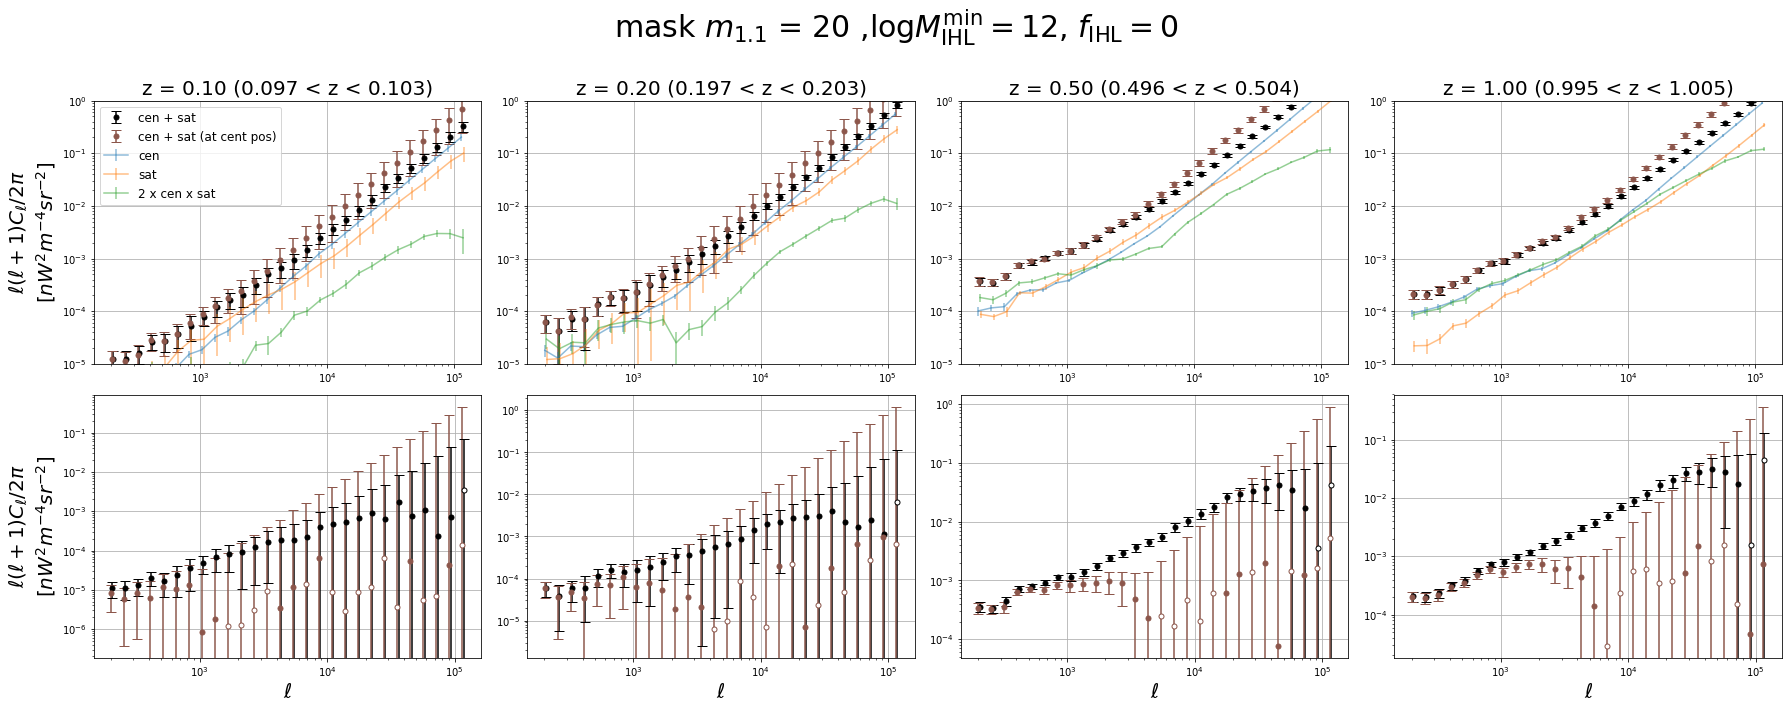

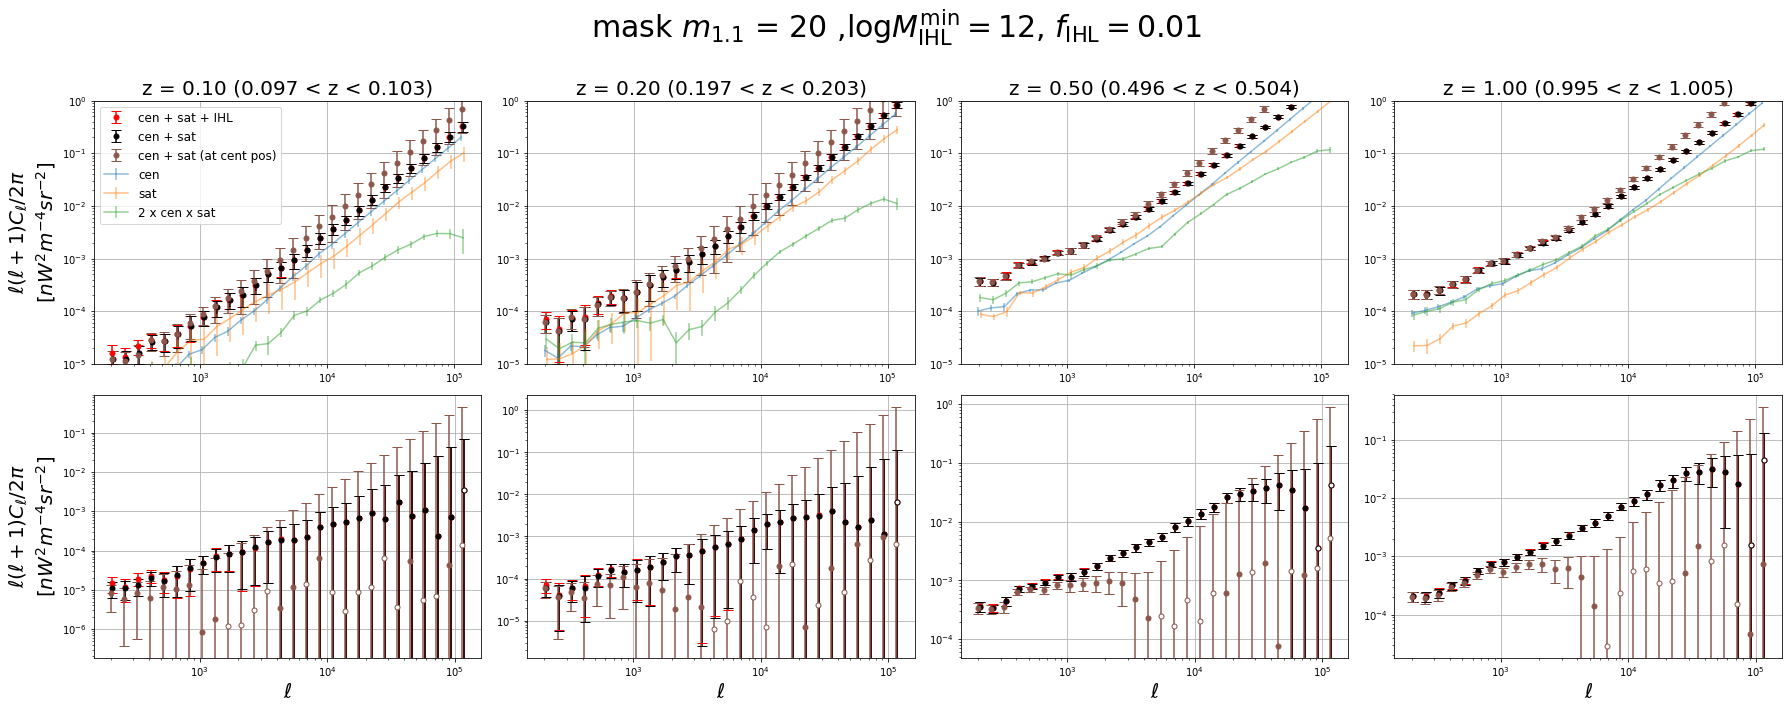

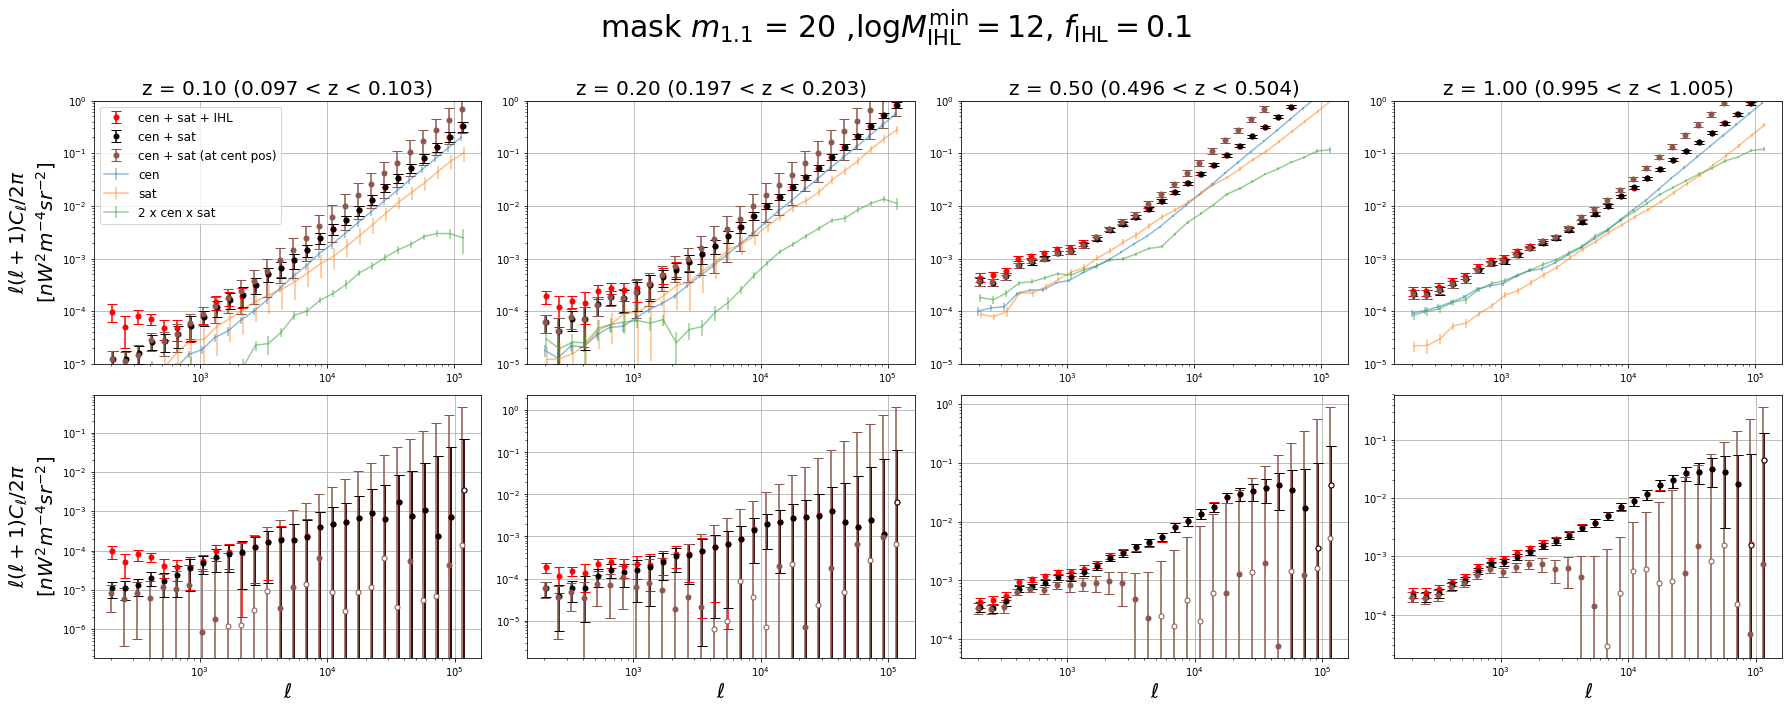

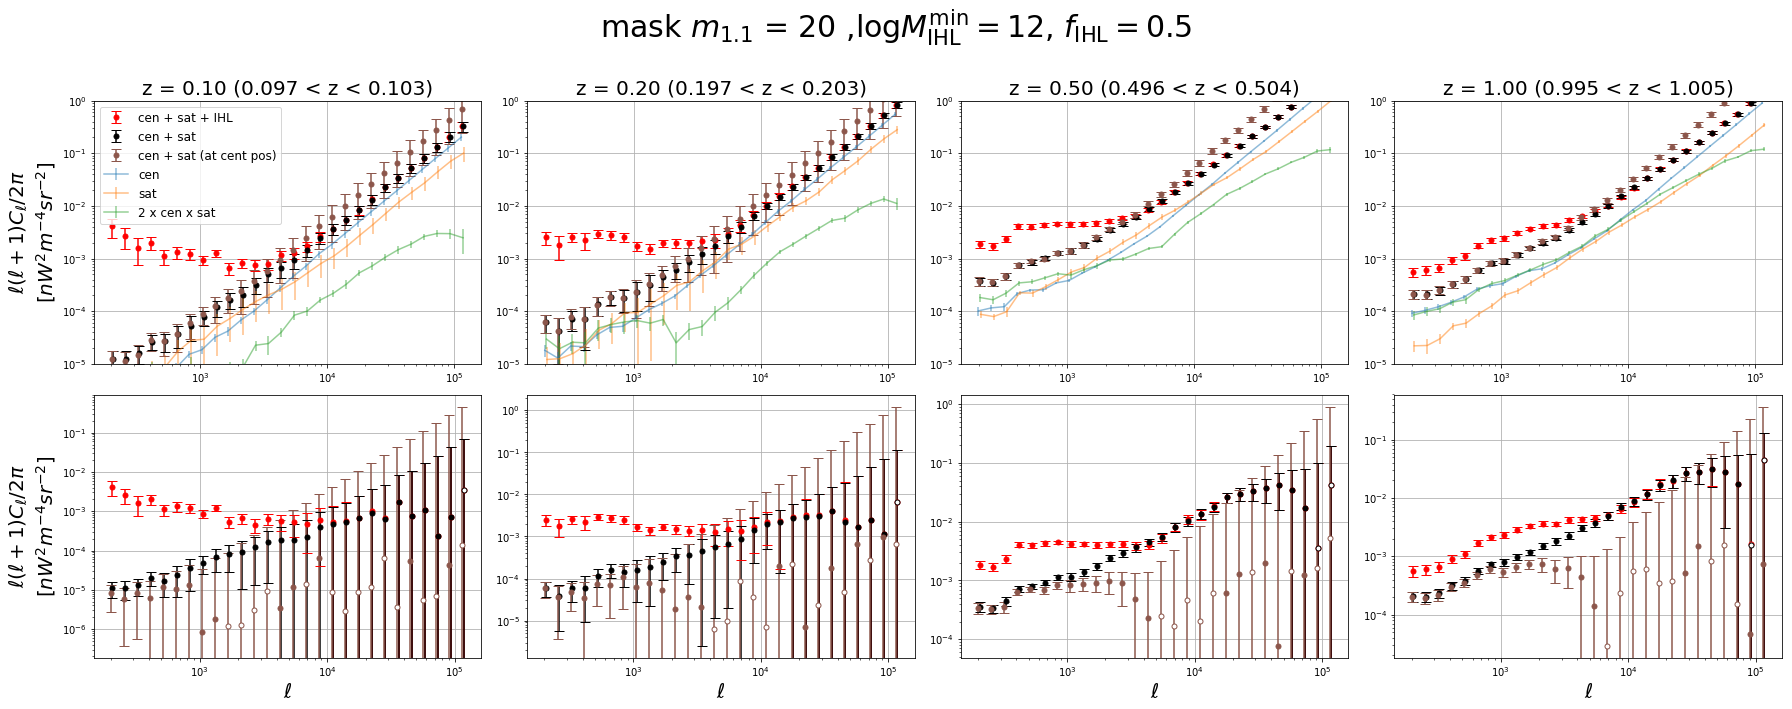

In [22]:
from micecat_field import *

fname = 'micecat_IHL_Cl_data.pkl'
with open(fname, "rb") as f:
    Cl_data = pickle.load(f)

ra_arr = Cl_data['ra_arr']
dec_arr = Cl_data['dec_arr']
dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
Nfields = len(ra_arr)*len(dec_arr)
l = Cl_data[0]['l']

for f_IHL in [0,0.01,0.1,0.5]:

    fig, ax = plt.subplots(2,4, figsize=(25,10))

    for iz, z_mid in enumerate([0.1, 0.2, 0.5, 1, None]):
        if z_mid is None:
            continue

        z_min, z_max = Cl_data[0][iz]['z_min'], Cl_data[0][iz]['z_max']

        Dla, Dlc, Dls, Dlh, Dlcs, Dlac, Dlha = [], [], [], [], [], [], []
        Dla_shsub, Dlc_shsub, Dls_shsub, Dlh_shsub, Dlac_shsub, Dlha_shsub = [], [], [], [], [], []

        for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
            Dla.append(Cl_data[ifield][iz]['Cla']*l*(l+1)/2/np.pi)
            Dlc.append(Cl_data[ifield][iz]['Clc']*l*(l+1)/2/np.pi)
            Dls.append(Cl_data[ifield][iz]['Cls']*l*(l+1)/2/np.pi)
            Dlh.append(Cl_data[ifield][iz]['Clh']*l*(l+1)/2/np.pi)
            Dlcs.append(Cl_data[ifield][iz]['Clcs']*l*(l+1)/2/np.pi)
            Dlac.append(Cl_data[ifield][iz]['Clac']*l*(l+1)/2/np.pi)
            Dlha.append(Cl_data[ifield][iz]['Clha']*l*(l+1)/2/np.pi)

            Dla_shsub.append(Cl_data[ifield][iz]['Cla_shsub']*l*(l+1)/2/np.pi)
            Dlc_shsub.append(Cl_data[ifield][iz]['Clc_shsub']*l*(l+1)/2/np.pi)
            Dls_shsub.append(Cl_data[ifield][iz]['Cls_shsub']*l*(l+1)/2/np.pi)
            Dlac_shsub.append(Cl_data[ifield][iz]['Clac_shsub']*l*(l+1)/2/np.pi)
        
        r_IHL = f_IHL / (1 - f_IHL)
        Dlihl = np.array(Dla) + r_IHL**2*np.array(Dlh) + 2*r_IHL*np.array(Dlha)
        Clsh = np.mean(Dlihl[:,-3:] / (l*(l+1)/2/np.pi)[-3:], axis=1)
        Clihl_shsub = (Dlihl / (l*(l+1)/2/np.pi)) - np.tile(Clsh, (len(l),1)).T
        Dlihl_shsub = Clihl_shsub * np.tile(l*(l+1)/2/np.pi, (Nfields,1))

        Dlihlerr = (np.percentile(Dlihl, 84, axis=0)\
                    -np.percentile(Dlihl, 16, axis=0))/2/np.sqrt(Nfields)
        Dlihl = np.median(Dlihl, axis=0) 
        Dlihl_shsub = np.median(Dlihl_shsub, axis=0)

        Dlaerr = (np.percentile(Dla, 84, axis=0)\
                  -np.percentile(Dla, 16, axis=0))/2/np.sqrt(Nfields)
        Dla = np.median(Dla, axis=0) 
        Dlcerr = (np.percentile(Dlc, 84, axis=0)\
                  -np.percentile(Dlc, 16, axis=0))/2/np.sqrt(Nfields)
        Dlc = np.median(Dlc, axis=0) 
        Dlserr = (np.percentile(Dls, 84, axis=0)\
                  -np.percentile(Dls, 16, axis=0))/2/np.sqrt(Nfields)
        Dls = np.median(Dls, axis=0)
        Dlcserr = (np.percentile(Dlcs, 84, axis=0)\
                   -np.percentile(Dlcs, 16, axis=0))/2/np.sqrt(Nfields)
        Dlcs = np.median(Dlcs, axis=0)
        Dlacerr = (np.percentile(Dlac, 84, axis=0)\
                   -np.percentile(Dlac, 16, axis=0))/2/np.sqrt(Nfields)
        Dlac = np.median(Dlac, axis=0)

        Dla_shsub = np.median(Dla_shsub, axis=0) 
        Dlc_shsub = np.median(Dlc_shsub, axis=0) 
        Dls_shsub = np.median(Dls_shsub, axis=0)
        Dlac_shsub = np.median(Dlac_shsub, axis=0)
        
        if f_IHL!=0:
            plot_err_log(l, Dlihl, Dlihlerr, ax=ax[0][iz], xlog=True, plot_xerr=False, 
                             color='r', capsize=5, markersize=10, 
                         label='cen + sat + IHL')
        plot_err_log(l*1.01, Dla, Dlaerr, ax=ax[0][iz], xlog=True, plot_xerr=False, 
                         color='k', capsize=5, markersize=10, 
                     label='cen + sat')
        plot_err_log(l*0.99, Dlac, Dlacerr, ax=ax[0][iz], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos)')
        ax[0][iz].errorbar(l*0.98, Dlc, Dlcerr, c='C0', alpha=0.5,
                          label='cen')
        ax[0][iz].errorbar(l*1.02, Dls, Dlserr, c='C1', alpha=0.5,
                          label='sat')
        ax[0][iz].errorbar(l*1.01, 2*Dlcs, 2*Dlcserr, c='C2', alpha=0.5,
                          label='2 x cen x sat')

        ax[0][iz].set_ylim([1e-5, 1e0])
        if z_mid is None:
            ax[iR][iz].set_ylim([1e-2, 1e3])

        ax[0][iz].set_xscale('log')
        ax[0][iz].set_yscale('log')
        ax[0][iz].grid()
        if z_mid is None:
            ax[0][iz].set_title('z = all (0 < z < 1.4)', fontsize=20)
        else:
            ax[0][iz].set_title('z = {:.2f} ({:.3f} < z < {:.3f})'\
                                 .format(z_mid, z_min, z_max), fontsize=20)

        if f_IHL!=0:
            plot_err_log(l*1.01, Dlihl_shsub, Dlihlerr, ax=ax[1][iz], xlog=True, plot_xerr=False, 
                             color='r', capsize=5, markersize=10, 
                        label='cen + sat + IHL')
        plot_err_log(l*1.01, Dla_shsub, Dlaerr, ax=ax[1][iz], xlog=True, plot_xerr=False, 
                         color='k', capsize=5, markersize=10, 
                    label='cen + sat')
        plot_err_log(l*0.99, Dlac_shsub, Dlacerr, ax=ax[1][iz], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos)')

        ax[1][iz].set_xscale('log')
        ax[1][iz].set_yscale('log')
        ax[1][iz].set_xlabel(r'$\ell$', fontsize=20)
        ax[1][iz].grid()

    ax[0][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                         fontsize=20)
    ax[1][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                         fontsize=20)
    ax[0][0].legend(fontsize=12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    fig.suptitle(r'mask $m_{1.1}$ = %d ,log$M_{\rm IHL}^{\rm min}=%d$, $f_{\rm IHL}=$'\
                 %(Cl_data['m_th'],Cl_data['logM_min']) + '{}'.format(f_IHL), fontsize=30)
    fig.savefig('plots/IHL/Cl_fIHL{}.pdf'.format(f_IHL), dpi = 100, bbox_inches='tight')

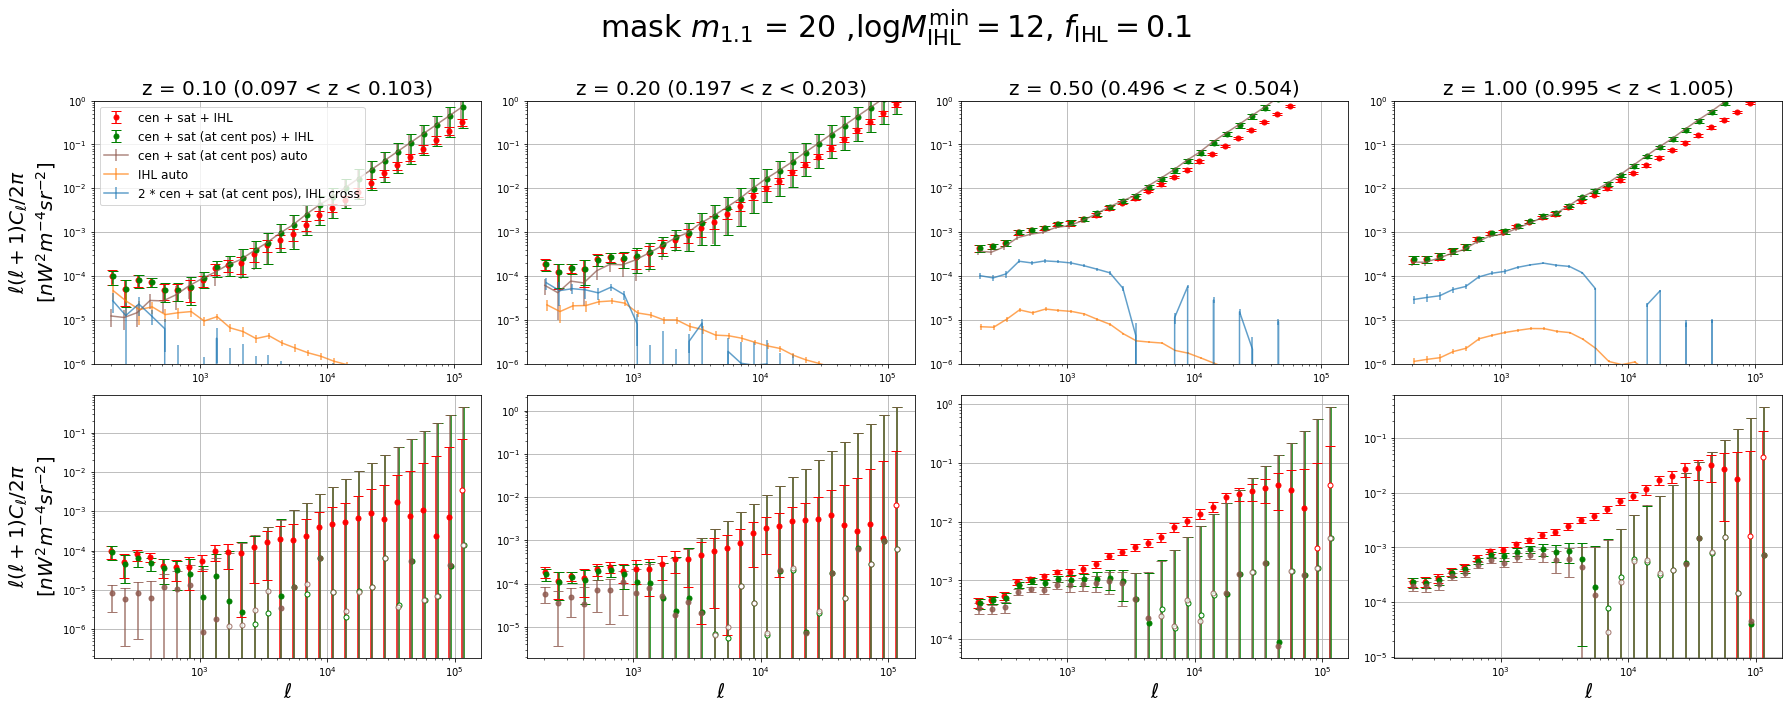

In [34]:
from micecat_field import *

fname = 'micecat_IHL_Cl_data.pkl'
with open(fname, "rb") as f:
    Cl_data = pickle.load(f)

ra_arr = Cl_data['ra_arr']
dec_arr = Cl_data['dec_arr']
dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
Nfields = len(ra_arr)*len(dec_arr)
l = Cl_data[0]['l']

for f_IHL in [0.1]:#[0,0.01,0.1,0.5]:
    
    r_IHL = f_IHL / (1 - f_IHL)
    
    fig, ax = plt.subplots(2,4, figsize=(25,10))

    for iz, z_mid in enumerate([0.1, 0.2, 0.5, 1, None]):
        if z_mid is None:
            continue

        z_min, z_max = Cl_data[0][iz]['z_min'], Cl_data[0][iz]['z_max']

        Dla, Dlac = np.zeros((Nfields,len(l))), np.zeros((Nfields,len(l)))
        Dlh = np.zeros((Nfields,len(l)))
        Dlha, Dlhac = np.zeros((Nfields,len(l))), np.zeros((Nfields,len(l)))
        for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
            Dla[ifield]=(Cl_data[ifield][iz]['Cla']*l*(l+1)/2/np.pi)
            Dlac[ifield]=(Cl_data[ifield][iz]['Clac']*l*(l+1)/2/np.pi)
            Dlh[ifield]=(Cl_data[ifield][iz]['Clh']*l*(l+1)/2/np.pi)
            Dlha[ifield]=(Cl_data[ifield][iz]['Clha']*l*(l+1)/2/np.pi)
            Dlhac[ifield]=(Cl_data[ifield][iz]['Clhac']*l*(l+1)/2/np.pi)
        
        Dl_ah = np.array(Dla) + r_IHL**2*np.array(Dlh) + 2*r_IHL*np.array(Dlha)
        Dl_ach = np.array(Dlac) + r_IHL**2*np.array(Dlh) + 2*r_IHL*np.array(Dlhac)
        Dl_acxac = np.array(Dlac)
        Dl_hxh = r_IHL**2*np.array(Dlh)
        Dl_acxh = 2*r_IHL*np.array(Dlhac)
                
        Clsh = np.mean(Dl_ah[:,-3:] / (l*(l+1)/2/np.pi)[-3:], axis=1)
        Cl_shsub = (Dl_ah / (l*(l+1)/2/np.pi)) - np.tile(Clsh, (len(l),1)).T
        Dl_ah_shsub = Cl_shsub * np.tile(l*(l+1)/2/np.pi, (Nfields,1))
        Dl_aherr = (np.percentile(Dl_ah, 84, axis=0)\
                  -np.percentile(Dl_ah, 16, axis=0))/2/np.sqrt(Nfields)
        Dl_ah = np.median(Dl_ah, axis=0)
        Dl_ah_shsub = np.median(Dl_ah_shsub, axis=0)
        
        Clsh = np.mean(Dl_ach[:,-3:] / (l*(l+1)/2/np.pi)[-3:], axis=1)
        Cl_shsub = (Dl_ach / (l*(l+1)/2/np.pi)) - np.tile(Clsh, (len(l),1)).T
        Dl_ach_shsub = Cl_shsub * np.tile(l*(l+1)/2/np.pi, (Nfields,1))
        Dl_acherr = (np.percentile(Dl_ach, 84, axis=0)\
                  -np.percentile(Dl_ach, 16, axis=0))/2/np.sqrt(Nfields)
        Dl_ach = np.median(Dl_ach, axis=0)
        Dl_ach_shsub = np.median(Dl_ach_shsub, axis=0)
        
        Clsh = np.mean(Dl_acxac[:,-3:] / (l*(l+1)/2/np.pi)[-3:], axis=1)
        Cl_shsub = (Dl_acxac / (l*(l+1)/2/np.pi)) - np.tile(Clsh, (len(l),1)).T
        Dl_acxac_shsub = Cl_shsub * np.tile(l*(l+1)/2/np.pi, (Nfields,1))
        Dl_acxacerr = (np.percentile(Dl_acxac, 84, axis=0)\
                  -np.percentile(Dl_acxac, 16, axis=0))/2/np.sqrt(Nfields)
        Dl_acxac = np.median(Dl_acxac, axis=0)
        Dl_acxac_shsub = np.median(Dl_acxac_shsub, axis=0)

        Clsh = np.mean(Dl_hxh[:,-3:] / (l*(l+1)/2/np.pi)[-3:], axis=1)
        Cl_shsub = (Dl_hxh / (l*(l+1)/2/np.pi)) - np.tile(Clsh, (len(l),1)).T
        Dl_hxh_shsub = Cl_shsub * np.tile(l*(l+1)/2/np.pi, (Nfields,1))
        Dl_hxherr = (np.percentile(Dl_hxh, 84, axis=0)\
                  -np.percentile(Dl_hxh, 16, axis=0))/2/np.sqrt(Nfields)
        Dl_hxh = np.median(Dl_hxh, axis=0)
        Dl_hxh_shsub = np.median(Dl_hxh_shsub, axis=0)

        Clsh = np.mean(Dl_acxh[:,-3:] / (l*(l+1)/2/np.pi)[-3:], axis=1)
        Cl_shsub = (Dl_acxh / (l*(l+1)/2/np.pi)) - np.tile(Clsh, (len(l),1)).T
        Dl_acxh_shsub = Cl_shsub * np.tile(l*(l+1)/2/np.pi, (Nfields,1))
        Dl_acxherr = (np.percentile(Dl_acxh, 84, axis=0)\
                  -np.percentile(Dl_acxh, 16, axis=0))/2/np.sqrt(Nfields)
        Dl_acxh = np.median(Dl_acxh, axis=0)
        Dl_acxh_shsub = np.median(Dl_acxh_shsub, axis=0)

        plot_err_log(l*0.99, Dl_ah, Dl_aherr, ax=ax[0][iz], xlog=True, plot_xerr=False, 
                         color='r', capsize=5, markersize=10, 
                     label='cen + sat + IHL')
        plot_err_log(l*1.01, Dl_ach, Dl_acherr, ax=ax[0][iz], xlog=True, plot_xerr=False, 
                         color='g', capsize=5, markersize=10, 
                     label='cen + sat (at cent pos) + IHL')
        ax[0][iz].errorbar(l*0.98, Dl_acxac, Dl_acxacerr, c='C5', alpha=0.7,
                          label='cen + sat (at cent pos) auto')
        ax[0][iz].errorbar(l*1.02, Dl_hxh, Dl_hxherr, c='C1', alpha=0.7,
                          label='IHL auto')
        ax[0][iz].errorbar(l*1.01, Dl_acxh, Dl_acxherr, c='C0', alpha=0.7,
                          label='2 * cen + sat (at cent pos), IHL cross')

        ax[0][iz].set_ylim([1e-6, 1e0])
        ax[0][iz].grid()
        if z_mid is None:
            ax[0][iz].set_title('z = all (0 < z < 1.4)', fontsize=20)
        else:
            ax[0][iz].set_title('z = {:.2f} ({:.3f} < z < {:.3f})'\
                                 .format(z_mid, z_min, z_max), fontsize=20)

        plot_err_log(l*0.99, Dl_ah_shsub, Dl_aherr, ax=ax[1][iz], xlog=True, plot_xerr=False, 
                         color='r', capsize=5, markersize=10, 
                    label='cen + sat + IHL')
        plot_err_log(l*1.01, Dl_ach_shsub, Dl_acherr, ax=ax[1][iz], xlog=True, plot_xerr=False, 
                         color='g', capsize=5, markersize=10, 
                    label='cen + sat (at cent pos) + IHL')
        plot_err_log(l, Dl_acxac_shsub, Dl_acxacerr, ax=ax[1][iz], xlog=True, plot_xerr=False, 
                         color='C5', capsize=5, markersize=10,  alpha=0.8,
                    label='cen + sat (at cent pos) auto')

        ax[1][iz].set_xlabel(r'$\ell$', fontsize=20)
        ax[1][iz].grid()

    ax[0][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                         fontsize=20)
    ax[1][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                         fontsize=20)
    ax[0][0].legend(fontsize=12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    fig.suptitle(r'mask $m_{1.1}$ = %d ,log$M_{\rm IHL}^{\rm min}=%d$, $f_{\rm IHL}=$'\
                 %(Cl_data['m_th'],Cl_data['logM_min']) + '{}'.format(f_IHL), fontsize=30)
    fig.savefig('plots/IHL/Cl_IHL.pdf', dpi = 100, bbox_inches='tight')

# Sample variance at low-z (z=0.1)

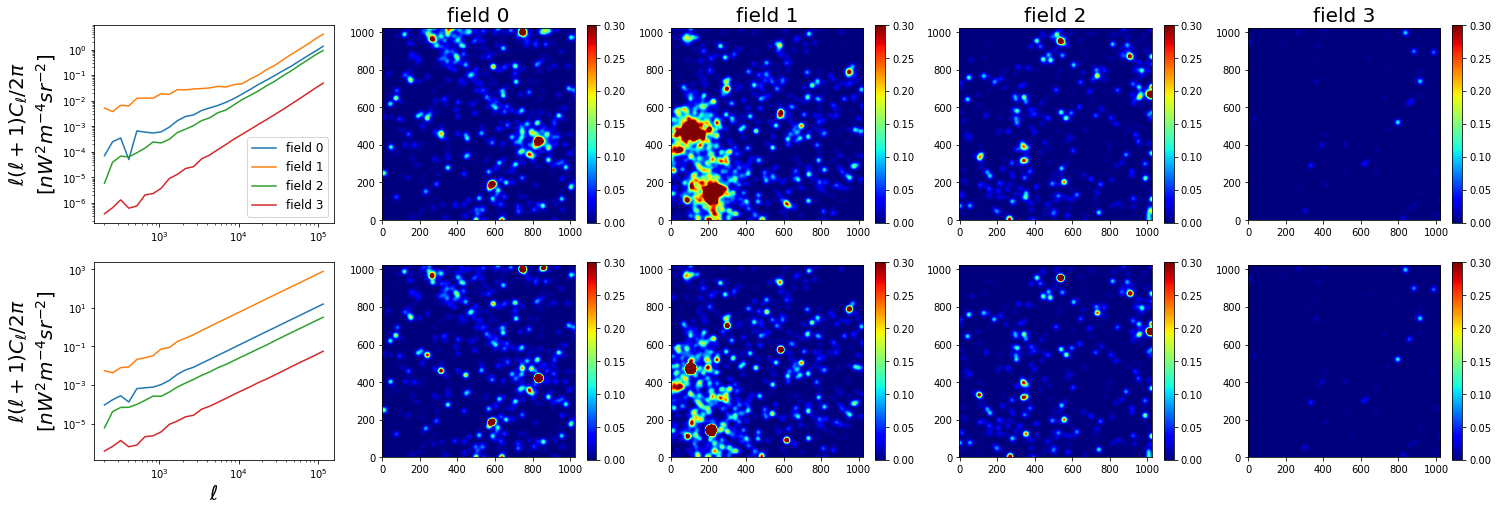

In [1]:
from micecat_field import *

ra_arr = np.arange(32,59,2)[::2]
dec_arr = np.arange(2,29,3)[::2]
bandname = 'ciber_I'
f_IHL_kwargs={'logM_min':12, 'f_IHL':1.}
m_th = 20

dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
fig, ax = plt.subplots(2,5,figsize=(25,8))
for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten()[:4], dec_grid.flatten()[:4])):
    
    print('field {}, ra = {}, dec = {}'.format(ifield, ra_cent, dec_cent))
            
    mcfield = micecat_field(ra_cent, dec_cent,Nx=1024,Ny=1024)
    df = mcfield.get_micecat_df()

    iz = 0
    z_mid = 0.1
    delz = 0.005
    Dz = (1 + z_mid) * delz
    z_min, z_max = z_mid - Dz/2, z_mid + Dz/2


    dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
             & (df[bandname+'_true'] > m_th)]
    srcmap_all = mcfield.make_map(bandname, df=dfi)

    dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max)]
    srcmap_allcen = mcfield.make_map_central(bandname,
                                             df=dfi, band_mask=bandname, m_th=m_th)

    imageclip(scipy.ndimage.gaussian_filter(srcmap_all, sigma=10),
              vmin=0, vmax=0.3, ax=ax[0][ifield+1])
    imageclip(scipy.ndimage.gaussian_filter(srcmap_allcen, sigma=10),
              vmin=0, vmax=0.3, ax=ax[1][ifield+1])
    ax[0][ifield+1].set_title('field %d'%ifield, fontsize=20)
    
    l,Cla, Claerr = get_power_spec(srcmap_all)
    l,Clac, Clacerr = get_power_spec(srcmap_allcen)
    
    ax[0][0].loglog(l, l*(l+1)*Cla/2/np.pi, label='field %d'%ifield)
    ax[1][0].loglog(l, l*(l+1)*Clac/2/np.pi)
    
ax[0][0].legend(fontsize=12)
ax[1][0].set_xlabel(r'$\ell$',fontsize=20)
ax[0][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                         fontsize=20)
ax[1][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$',
                         fontsize=20)
clear_output()

***
# Fitting the bias

In [ ]:
def power_spec_3D(map1, map2, dx, dy, dz, window_func = None):
    '''
    calculate cross power spectrum of a 3-dim Nx x Ny x Nz map1 and map2. 
    Set map1 = map2 for auto spectrum.
    
    Inputs:
    ======
    map1, map2: input 3D maps
    dx, dy, dz: the grid size in the 0th, 1st dimension
    window_func: [None, 'blackman'] apply window function. Default not apply (None)
    
    Outputs:
    =======
    P3D: 3D power spectrum, 
        dimension: (Nx+1)/2 if Nx odd; Nx/2 + 1 if Nx even (same for Ny, Nz)
    kx_vec, ky_vec, kz_vec: corresponding kx, ky vector
    '''
    
    if map1.shape != map2.shape:
        raise ValueError('two input maps do not have the same shape')

    Nx, Ny, Nz = map1.shape
        
    kx_vec_all = np.fft.fftfreq(Nx) * 2 * np.pi / dx
    ky_vec_all = np.fft.fftfreq(Ny) * 2 * np.pi / dy
    kz_vec_all = np.fft.fftfreq(Nz) * 2 * np.pi / dz
    ftmap1 = np.fft.fftn(map1) * dx * dy * dz
    ftmap2 = np.fft.fftn(map2) * dx * dy * dz
    
    V = Nx * Ny * Nz * dx * dy * dz
    P3D_all = np.real(ftmap1 * np.conj(ftmap2)) / V
    
    Nuse = _kvec_Nuse(Nz)
    kz_vec_all= abs(kz_vec_all[:Nuse])
    P3D_all = P3D_all[:,:,:Nuse]
    N3D_all = np.ones_like(P3D_all)
    
    # extract only the positive kx, ky part
    N_use = _kvec_Nuse(Ny)
    N_dup = _kvec_Ndup(Ny)
    ky_vec = abs(ky_vec_all[:N_use])    
    P3D = P3D_all[:,: N_use, :]
    N3D = N3D_all[:,: N_use, :]
    
    Pdup = P3D_all[:,-N_dup:, :]
    Ndup = N3D_all[:,-N_dup:, :]
    P3D[:,1:1+N_dup,:] = (P3D[:,1:1+N_dup,:] + np.flip(Pdup, axis=1))/2 
    N3D[:,1:1+N_dup,:] = N3D[:,1:1+N_dup,:] + np.flip(Ndup, axis=1)
    
    N_use = _kvec_Nuse(Nx)
    N_dup = _kvec_Ndup(Nx)
    kx_vec = abs(kx_vec_all[:N_use])    
    P3D = P3D[: N_use,:, :]
    N3D = N3D[: N_use,:, :]
    
    Pdup = P3D[-N_dup:, :, :]
    Ndup = N3D[-N_dup:, :, :]
    P3D[1:1+N_dup,:,:]  = (P3D[1:1+N_dup,:,:] + np.flip(Pdup, axis=0))/2 
    N3D[1:1+N_dup,:,:]  = N3D[1:1+N_dup,:,:] + np.flip(Ndup, axis=0)
    
    kz_vec = kz_vec_all.copy()
    return P3D, kx_vec, ky_vec, kz_vec, N3D

def PS3D_to_PS1D(P3D, kx_vec, ky_vec, kz_vec, N3D, binedges = [], nbins = 30, logbin = True):
    '''
    Calculate the 1D circular averaged power spectrum
    '''
    kx_arr,ky_arr,kz_arr = np.meshgrid(kx_vec, ky_vec, kz_vec)
    kx_arr = np.swapaxes(kx_arr,1,0)
    ky_arr = np.swapaxes(ky_arr,1,0)
    kz_arr = np.swapaxes(kz_arr,1,0)
    kr_arr = np.sqrt(kx_arr**2 + ky_arr**2 + kz_arr**2)
    kmin = min(kr_arr[kr_arr>0])
    kmax = max(kr_arr[kr_arr>0])
    
    if len(binedges)==0:
        if logbin: 
            binedges = np.logspace(np.log10(kmin),np.log10(kmax), nbins+1)
            bins = (binedges[:-1] + binedges[1:]) / 2
            
        else: 
            binedges = np.linspace(kmin, kmax, nbins+1)
            bins = np.sqrt(binedges[:-1] * binedges[1:])
            
    else:
        bins = (binedges[:-1] + binedges[1:]) / 2
        
    # make sure the boundary points are not excluded by numerical error
    binedges[0] *=0.99
    binedges[-1] *= 1.01
    
    P1D = np.histogram(kr_arr, bins=binedges, weights=P3D)[0] \
         / np.histogram(kr_arr, bins=binedges)[0]
    
    N1D = np.histogram(kr_arr, bins=binedges, weights=N3D)[0]
    
    return P1D, bins, N1D

def PS3D_to_PS2D(P3D, kx_vec, ky_vec, kz_vec, N3D, \
                 binedges_p = [], binedges_l = [], nbins_p = 30, nbins_l = 30, logbin = True):
    '''
    Calculate the 1D circular averaged power spectrum
    '''
    kx_arr,ky_arr,kz_arr = np.meshgrid(kx_vec, ky_vec, kz_vec)
    kx_arr = np.swapaxes(kx_arr,1,0)
    ky_arr = np.swapaxes(ky_arr,1,0)
    kz_arr = np.swapaxes(kz_arr,1,0)
    
    kl_arr = kz_arr.flatten()
    klmin = min(kl_arr[kl_arr>0])
    klmax = max(kl_arr[kl_arr>0])

    kp_arr = np.sqrt(kx_arr**2 + ky_arr**2).flatten()
    kpmin = min(kp_arr[kp_arr>0])
    kpmax = max(kp_arr[kp_arr>0])
    
    if len(binedges_l)==0:
        if logbin: 
            binedges_l = np.logspace(np.log10(klmin),np.log10(klmax), nbins_l+1)
            bins_l = (binedges_l[:-1] + binedges_l[1:]) / 2
        
        else: 
            binedges_l = np.linspace(klmin, klmax, nbins_l+1)
            bins_l = np.sqrt(binedges_l[:-1] * binedges_l[1:])
            
    else:
        bins_l = (binedges_l[:-1] + binedges_l[1:]) / 2

    binedges_l[0] *= 0.99
    binedges_l[-1] *= 1.01

    if len(binedges_p)==0:
        if logbin: 
            binedges_p = np.logspace(np.log10(kpmin),np.log10(kpmax), nbins_p+1)
            bins_p = (binedges_p[:-1] + binedges_p[1:]) / 2
            
        else: 
            binedges_p = np.linspace(kpmin, kpmax, nbins_p+1)
            bins_p = np.sqrt(binedges_p[:-1] * binedges_p[1:])
            
    else:
        bins_p = (binedges_p[:-1] + binedges_p[1:]) / 2
    
    binedges_p[0] *= 0.99
    binedges_p[-1] *= 1.01
        
    
    P2D = np.histogram2d(kp_arr,kl_arr, bins=[binedges_p,binedges_l], weights=P3D.flatten())[0] \
         / np.histogram2d(kp_arr,kl_arr, bins=[binedges_p,binedges_l])[0]
    
    N2D = np.histogram2d(kp_arr,kl_arr, bins=[binedges_p,binedges_l], weights=N3D.flatten())[0]
    
    return P2D, bins_p, bins_l, N2D

def _kvec_Nuse(N):
    # number of useful k space values
    if N % 2 == 1: Nuse = int((N - 1) / 2) + 1
    else: Nuse = int((N - 2) / 2) + 2
    return Nuse

def _kvec_Ndup(N):
    # number of duplicated (negative) k values
    if N % 2 ==1: Ndup = int((N - 1) / 2)
    else: Ndup = int((N - 2) / 2)
    return Ndup

In [10]:
from micecat_field import *
from cosmo_tools import *

ra_cent,  dec_cent = 32, 2
mcfield = micecat_field(ra_cent, dec_cent)
df = mcfield.get_micecat_df()
vox_size = 1 # [Mpc/h]

Text(0, 0.5, '$P(k)$ [Mpc$^3$ h$^{-3}$]')

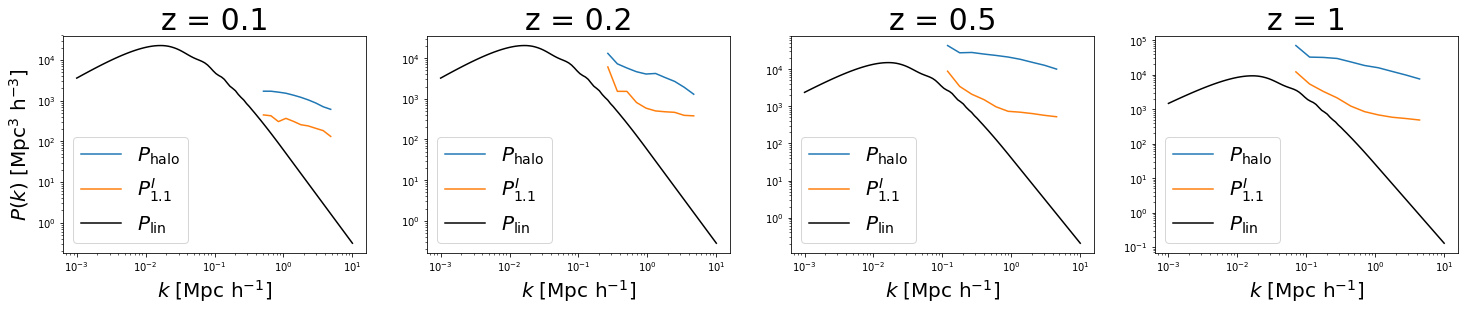

In [20]:
fig, ax = plt.subplots(1,4,figsize=(25,4))
for iz, z_mid in enumerate([0.1,0.2,0.5,1]):
    cube_halo = mcfield.make_data_cube(z_mid, bandname='Mhalo', df=df, vox_size=vox_size)
    cube_ciberI = mcfield.make_data_cube(z_mid, bandname='ciber_I', df=df, vox_size=vox_size)

    P3D, kx_vec, ky_vec, kz_vec, N3D = power_spec_3D(cube_halo/np.mean(cube_halo)-1,
                                                     cube_halo/np.mean(cube_halo)-1, 
                                                     vox_size, vox_size, vox_size)
    P_arr, k_arr, N1D = PS3D_to_PS1D(P3D, kx_vec, ky_vec, kz_vec, N3D, nbins=10)
    ax[iz].loglog(k_arr,P_arr, label=r'$P_{\rm halo}$')
    
    P3D, kx_vec, ky_vec, kz_vec, N3D = power_spec_3D(cube_ciberI/np.mean(cube_ciberI)-1,
                                                     cube_ciberI/np.mean(cube_ciberI)-1, 
                                                     vox_size, vox_size, vox_size)
    P_arr, k_arr, N1D = PS3D_to_PS1D(P3D, kx_vec, ky_vec, kz_vec, N3D, nbins=10)
    ax[iz].loglog(k_arr,P_arr, label=r'$P_{1.1}^{I}$')
    
    P_arr, k_arr = get_Plin_fast(z_mid,np.logspace(-3,1,100))
    ax[iz].loglog(k_arr,P_arr,'k', label=r'$P_{\rm lin}$')
    
    ax[iz].legend(loc=3,  fontsize=20)
    ax[iz].set_title('z = {}'.format(z_mid), fontsize=30)
    ax[iz].set_xlabel(r'$k$ [Mpc h$^{-1}$]',fontsize=20)
ax[0].set_ylabel(r'$P(k)$ [Mpc$^3$ h$^{-3}$]',fontsize=20)

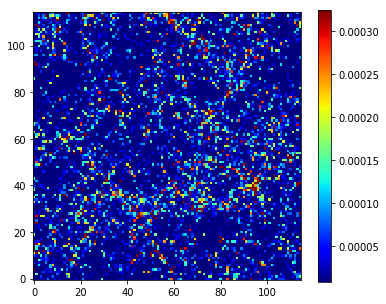

In [23]:
imageclip(np.sum(cube_ciberI,axis=0))

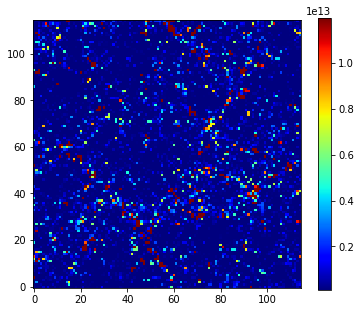

In [22]:
imageclip(np.sum(cube_halo,axis=0))